# Car Price Prediction Analysis

## Overview of Problem Statement

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:* Which variables are significant in predicting the price of a car.
* 
How well those variables describe the price of a aa.r
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

## Objective

The objective of this analysis is to model car prices in the US market and provide actionable insights for a Chinese automobile company entering the market. The key goals are:

*  **1.Identify Significant Factors:** Determine the variables that significantly influence car prices.
*  **2.Build Predictive Models:** Develop regression models to accurately predict car prices based on independent variables.
*  **3.Evaluate Model Performance:** Compare various models to identify the best one for understanding pricing dynamics.

## Data Description

**Source:** The dataset appears to be a collection of car specifications and pricing data, likely gathered from market surveys or automotive databases.

**Shape:**
        Rows: 205
        Columns: 26

**Features:**
* **car_ID:** Unique identifier for each car.
* **symboling:** Insurance risk rating, ranging from -3 (safe) to +3 (risky).
* **CarName:** Name of the car (manufacturer and model).
* **fueltype:** Type of fuel used (e.g., gas, diesel).
* **aspiration:** Type of aspiration used in the engine (std or turbo).
* **doornumber:** Number of doors (two or four).
* **carbody:** Type of car body (e.g., sedan, hatchback).
* **drivewheel:** Drive wheel type (e.g., fwd, rwd, 4wd).
* **enginelocation:** Location of the engine (front or rear).
* **wheelbase:** Distance between the front and rear wheels (in inches).
* **carlength:** Length of the car (in inches).
* **carwidth:** Width of the car (in inches).
* **carheight:** Height of the car (in inches).
* **curbweight:** Weight of the car without occupants or baggage (in pounds).
* **enginetype:** Type of engine (e.g., ohc, ohcv).
* **cylindernumber:** Number of cylinders in the engine.
* **enginesize:** Engine displacement (in cubic inches).
* **fuelsystem:** Type of fuel system (e.g., mpfi, 2bbl).
* **boreratio:** Ratio of the bore diameter to the stroke length.
* **stroke:** Stroke length of the engine (in inches).
* **compressionratio:** Ratio of the engine's cylinder volume to the combustion chamber volume.
* **horsepower:** Engine power output (in horsepower).
* **peakrpm:** Engine speed at peak horsepower (in RPM).
* **citympg:** Fuel efficiency in city driving (in miles per gallon).
* **highwaympg:** Fuel efficiency on the highway (in miles per gallon).
* **price:** Price of the car (in USD, target variable).

## Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


## EDA (Exploratory Data Analysis)

### Check the shape of the Dataset

In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Identify numerical and categorical columns

In [7]:
num_cols = df.select_dtypes(include = 'number').columns
num_cols

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
num_cols.shape

(16,)

In [9]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [10]:
cat_column = df.select_dtypes(include = 'object')
cat_column

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [11]:
cat_cols.shape

(10,)

### Checking for Duplicates

In [12]:
df.duplicated().sum()

0

There are no duplicated values.

### Checking null values

In [13]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null values.

In [14]:
#Discriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [15]:
df.describe(include='object').T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


**Notes**
df.describe(include='object').T:
Provides summary statistics (mean, standard deviation, min, max, etc.) for numeric columns in the DataFrame by default.
If applied to a DataFrame with categorical columns (e.g., include='object'), it gives statistics such as the count, unique values, top value, and frequency of the top value.

### Analysing numerical columns

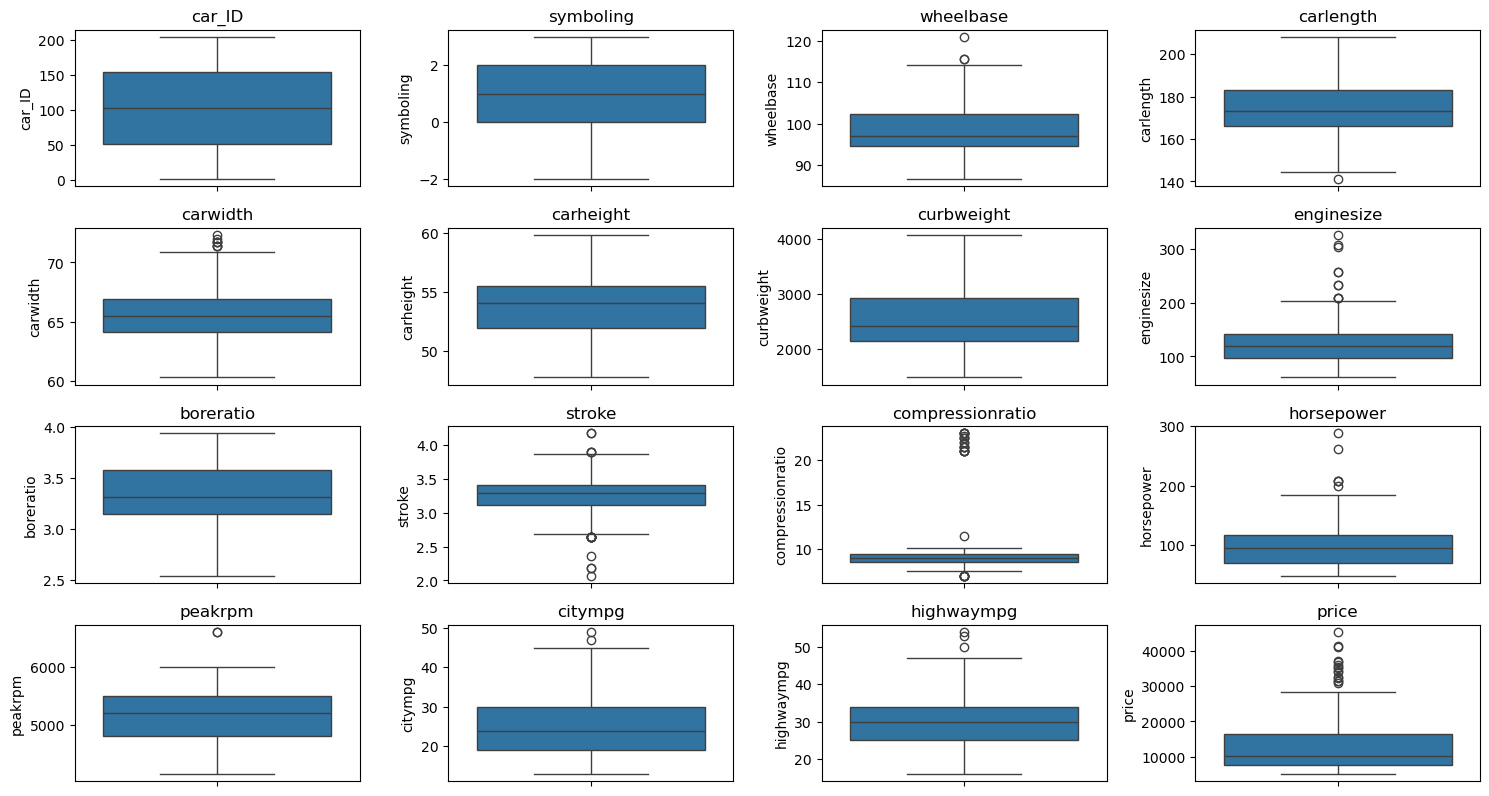

In [16]:
plt.figure(figsize=(15, 10))
#enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

A few features have some outliers.

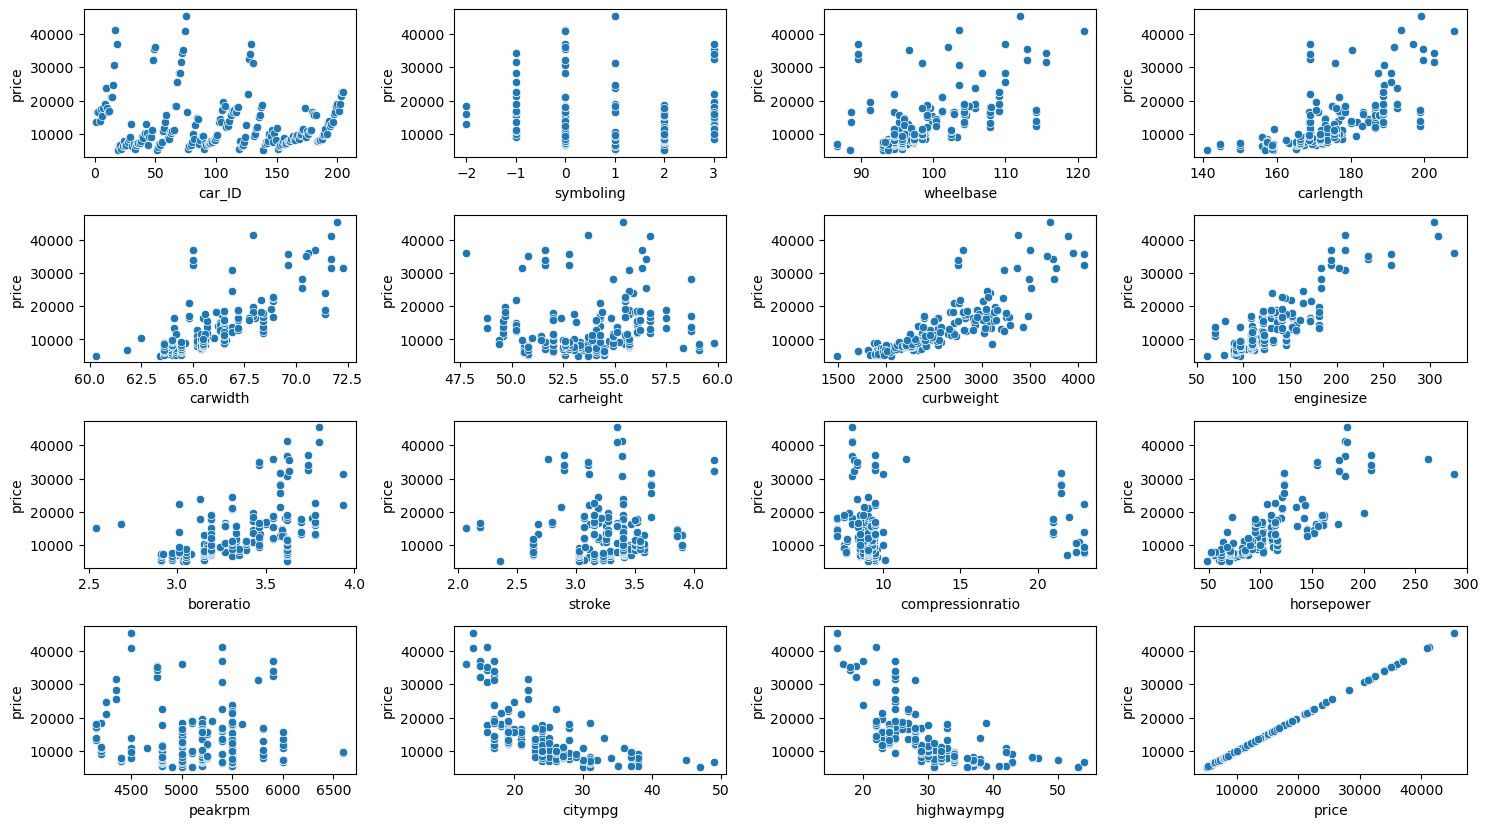

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df,x=col,y='price')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

There is a linear relationship between target and other features.

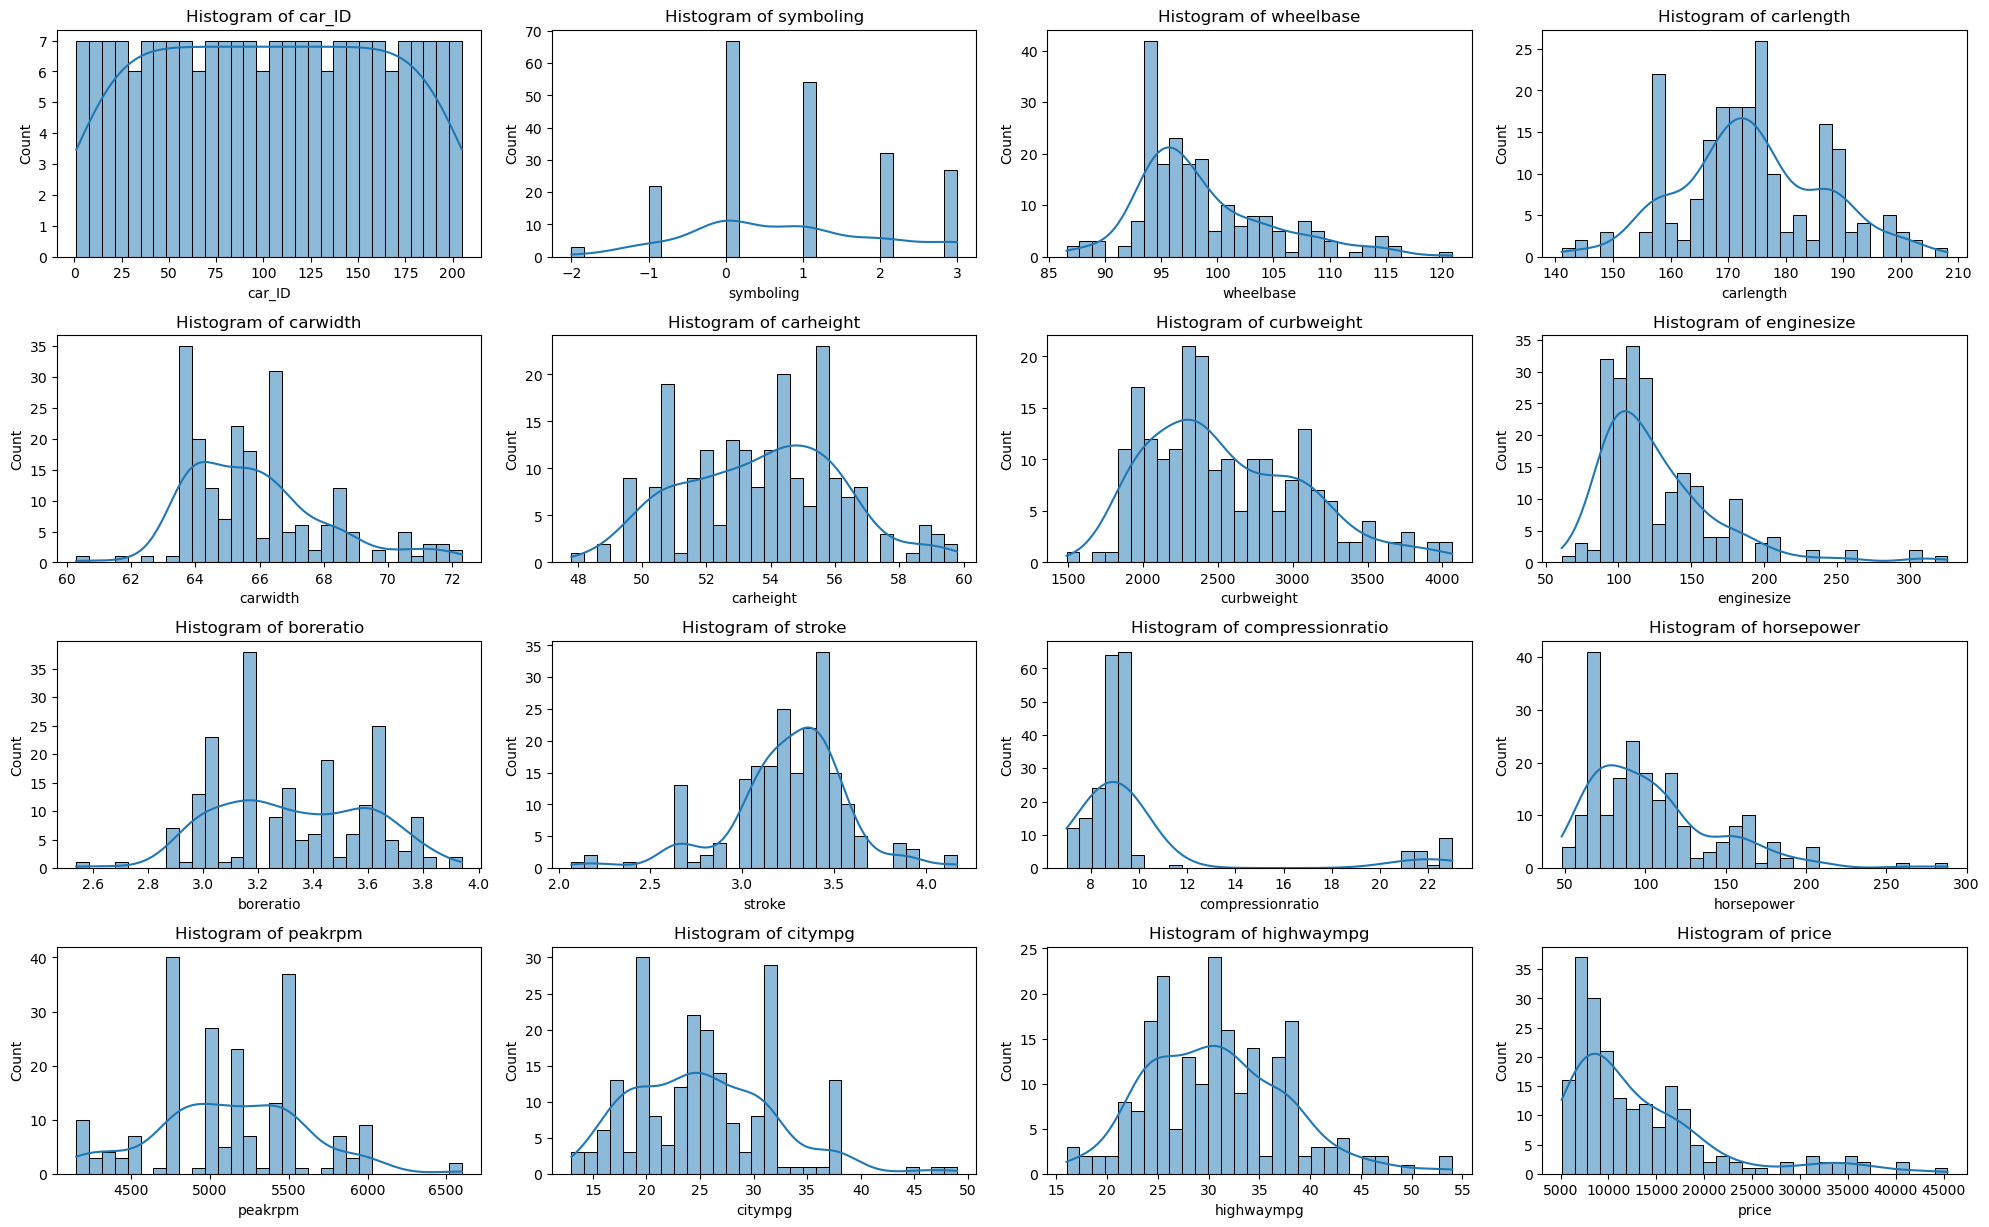

In [18]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 4, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()     

### skewness 

In [19]:
import pandas as pd
from scipy.stats import skew
# Example: Calculate skewness for numeric columns
skewness = df[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)


Skewness of Numeric Columns:
 car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

No Skewness:
 car_ID       0.000000
symboling    0.211072
carlength    0.155954
carheight    0.063123
boreratio    0.020156
peakrpm      0.075159
dtype: float64

Moderate Skewness:
 carwidth      0.904003
curbweight    0.681398
stroke       -0.689705
citympg       0.663704
highwaympg    0.539997
dtype: float64

High Skewness:
 wheelbase           1.050214
enginesize          1.947655
compressionratio    2.610862
horsepower          1.405310
price               1.777678
dtype: float64


No Skewness (Symmetrical): Skewness between -0.5 and 0.5.
Moderate Skewness: Skewness between -1 and -0.5 or 0.5 and 1.
High Skewness: Skewness less than -1 or greater than 1.

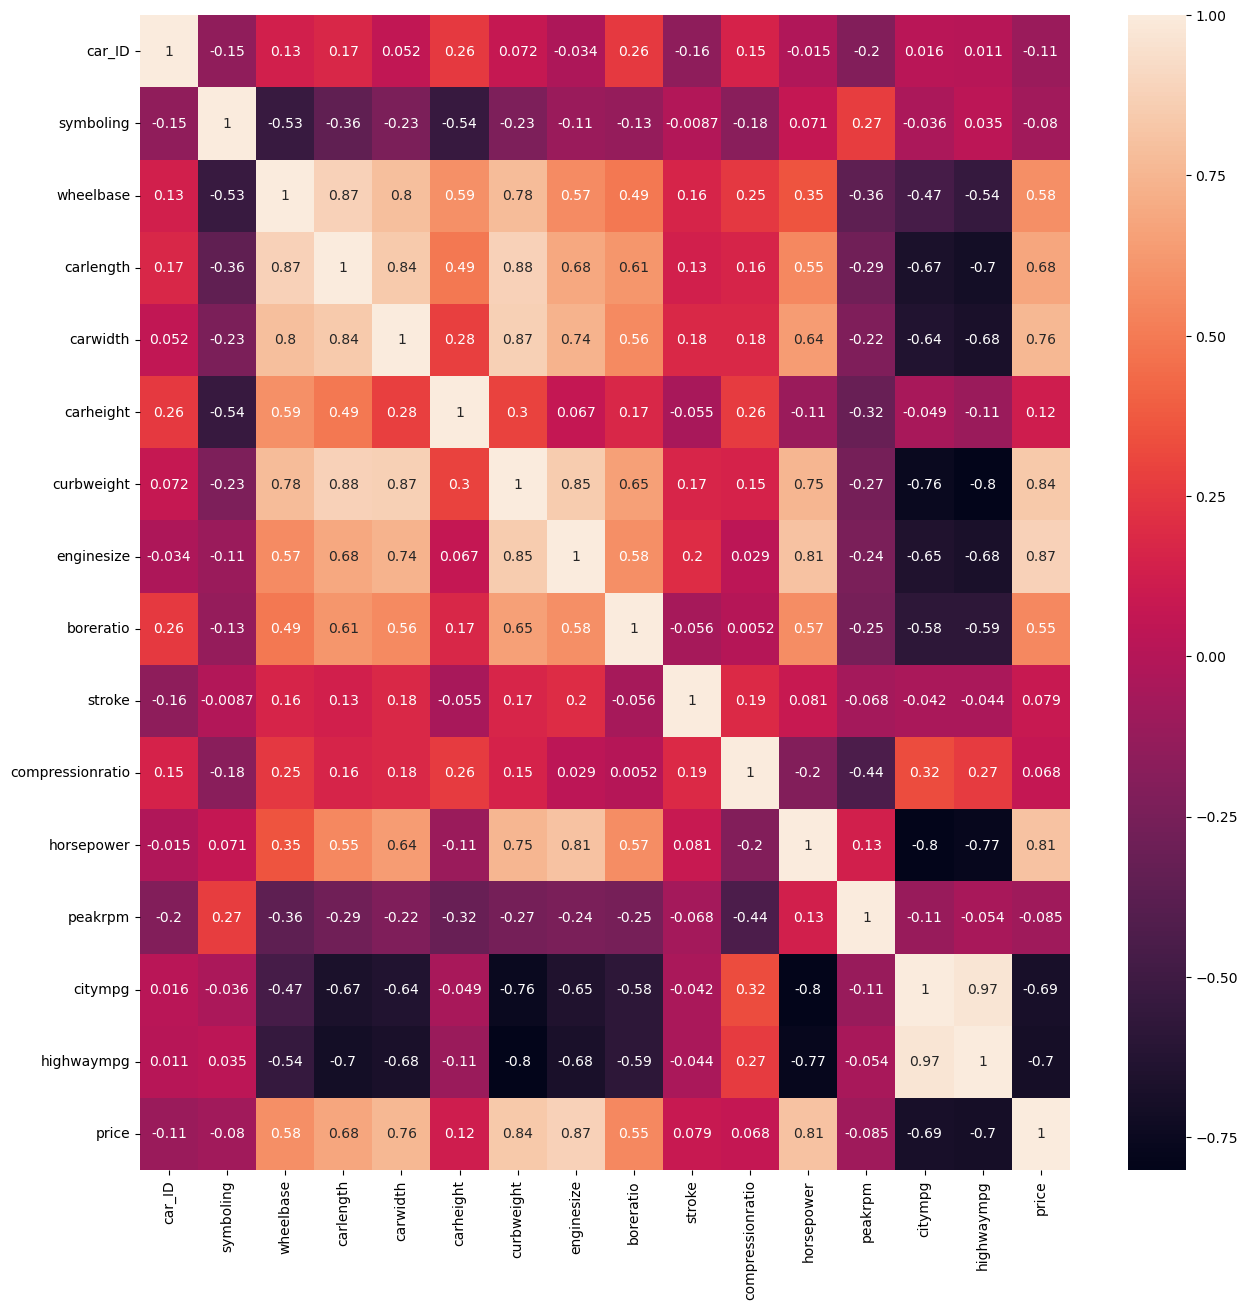

In [20]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

Strong Positive Correlations with price:

    enginesize (0.874): Larger engines strongly correspond to higher prices.
    curbweight (0.835): Heavier cars tend to be more expensive.
    horsepower (0.808): Higher power contributes significantly to price.
    carwidth (0.759): Wider cars are generally pricier.
    carlength (0.683) and wheelbase (0.578): Car size and base length also impact price.

Weak Correlations:

    carheight (0.119) and stroke (0.079) have minimal effects on price.
    compressionratio (0.068) shows an insignificant positive correlation.

Negative Correlations:

    highwaympg (-0.698) and citympg (-0.686): Higher fuel efficiency tends to lower the price, likely due to smaller engines or lower power.
    symboling (-0.080) and peakrpm (-0.085) have weak negative correlations.

### Analysing categorical columns

In [21]:
# Checking the number of unique values in each categorical column
cat_cols = df.select_dtypes(include=['object', 'category']).columns

unique_counts = df[cat_cols].nunique()
unique_counts

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

Distribution of CarName:
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


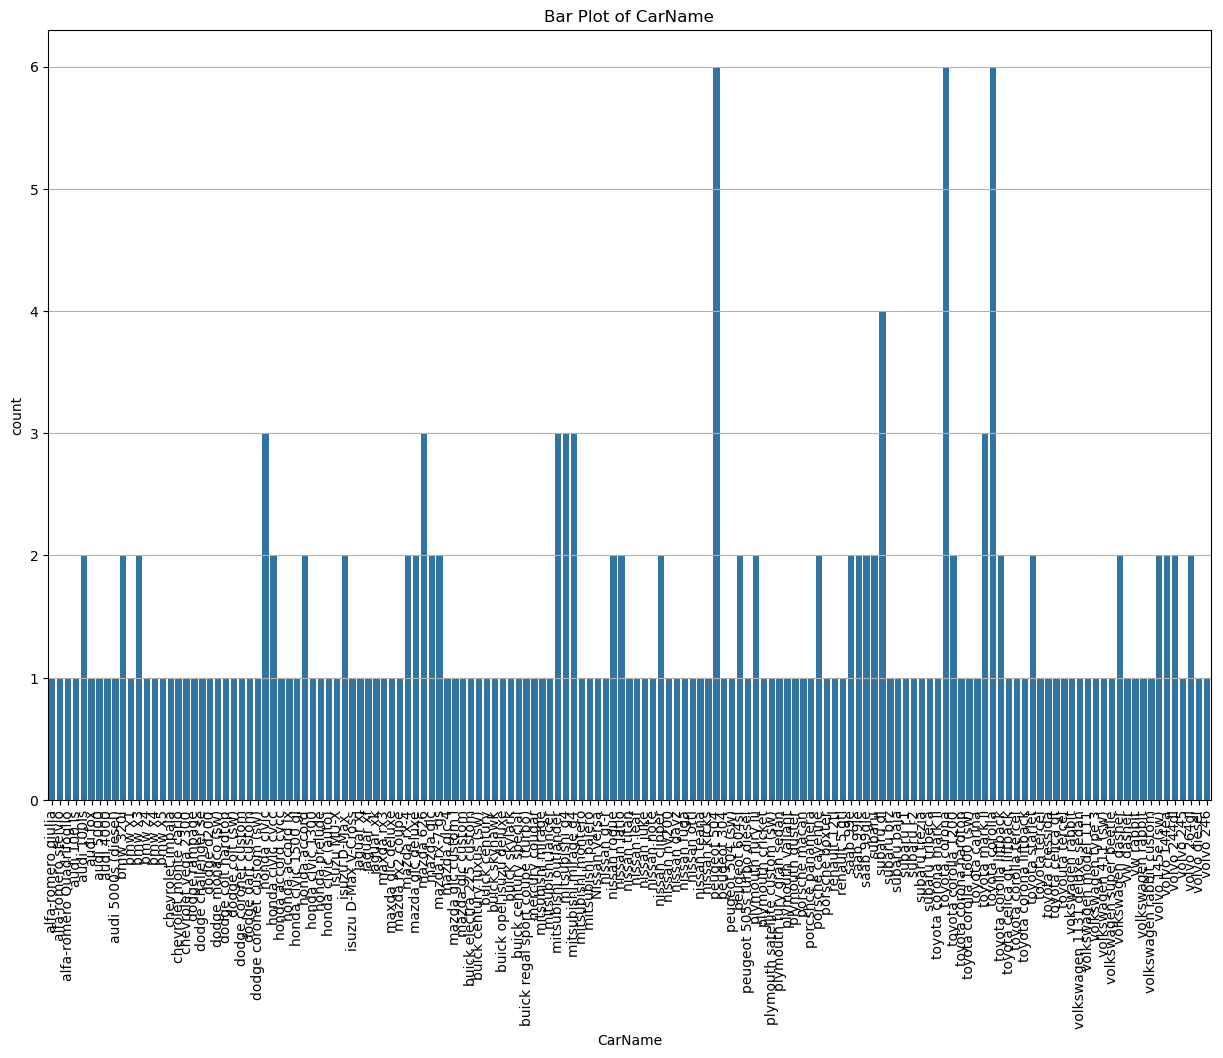

Distribution of fueltype:
fueltype
gas       185
diesel     20
Name: count, dtype: int64


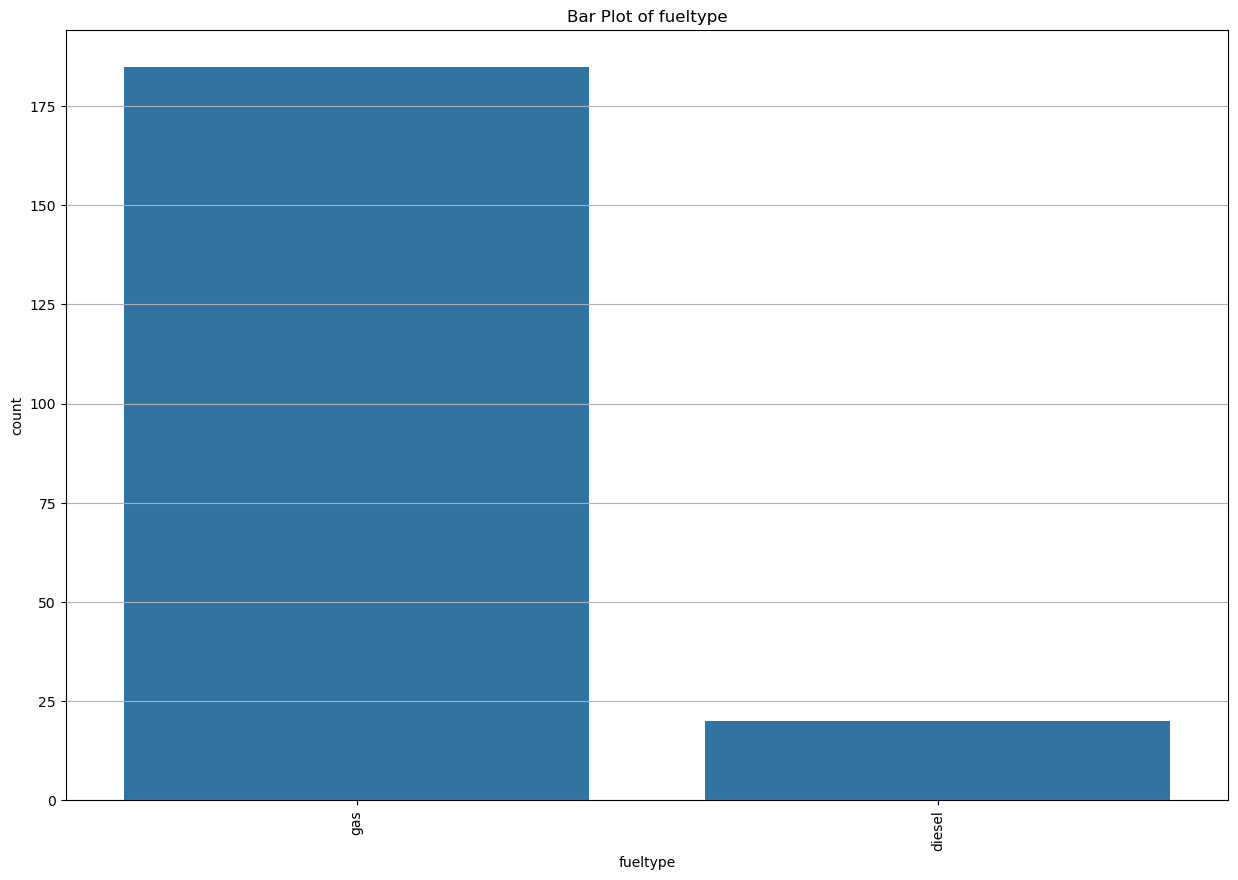

Distribution of aspiration:
aspiration
std      168
turbo     37
Name: count, dtype: int64


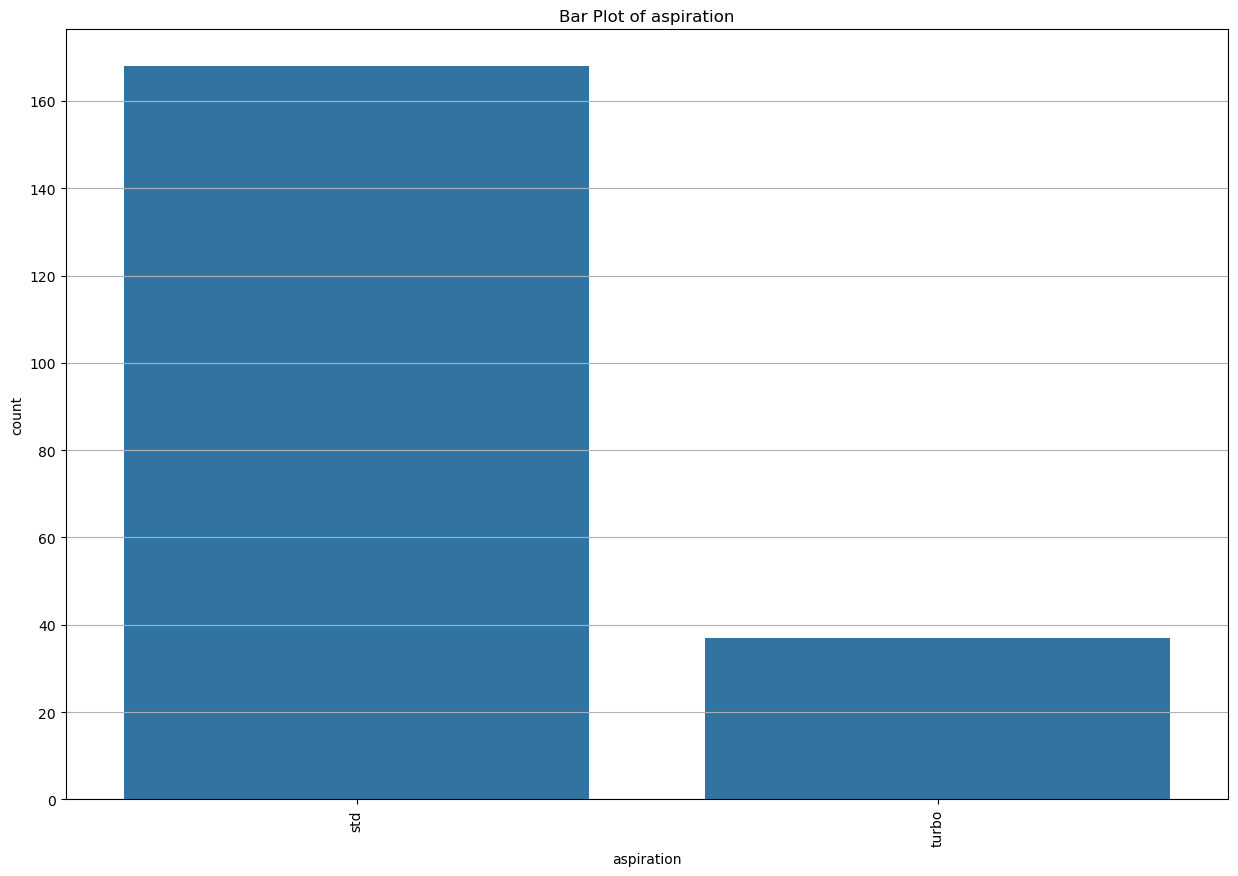

Distribution of doornumber:
doornumber
four    115
two      90
Name: count, dtype: int64


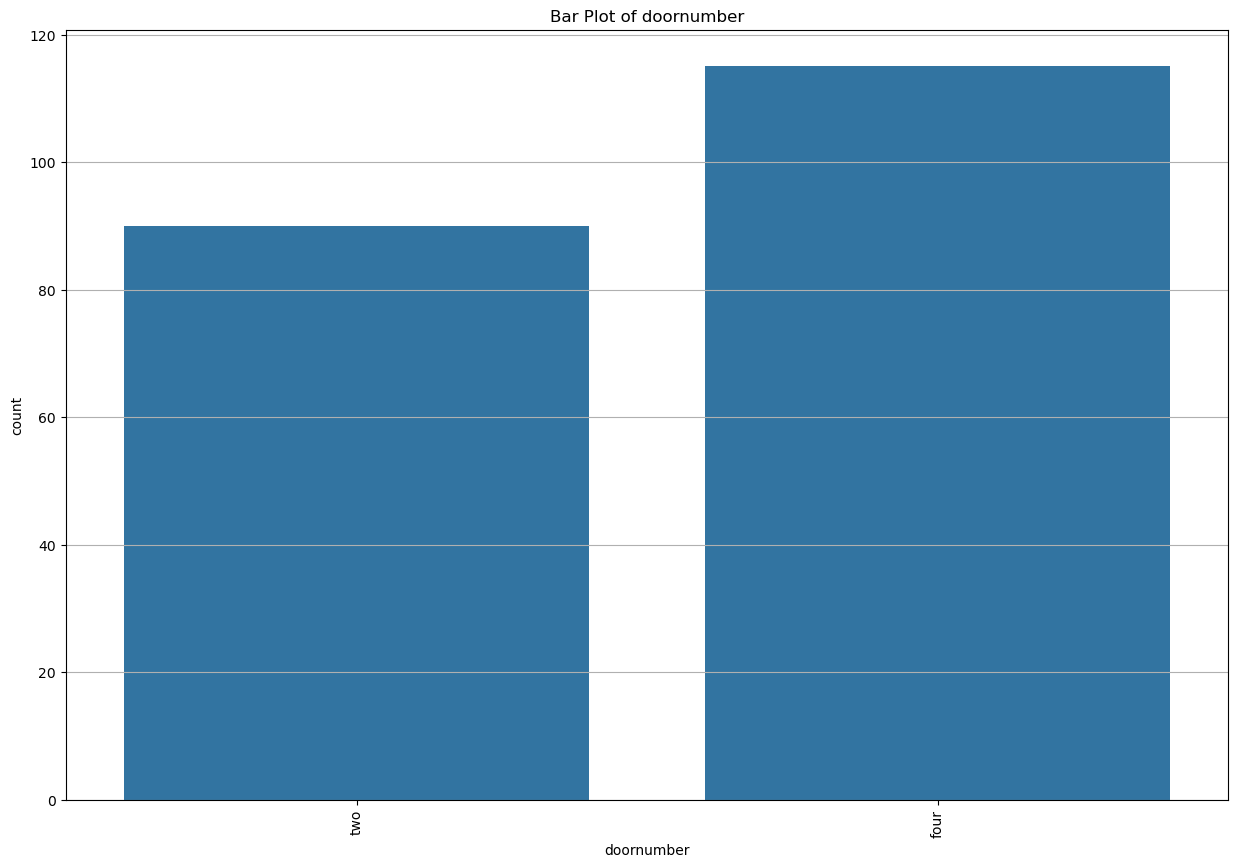

Distribution of carbody:
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


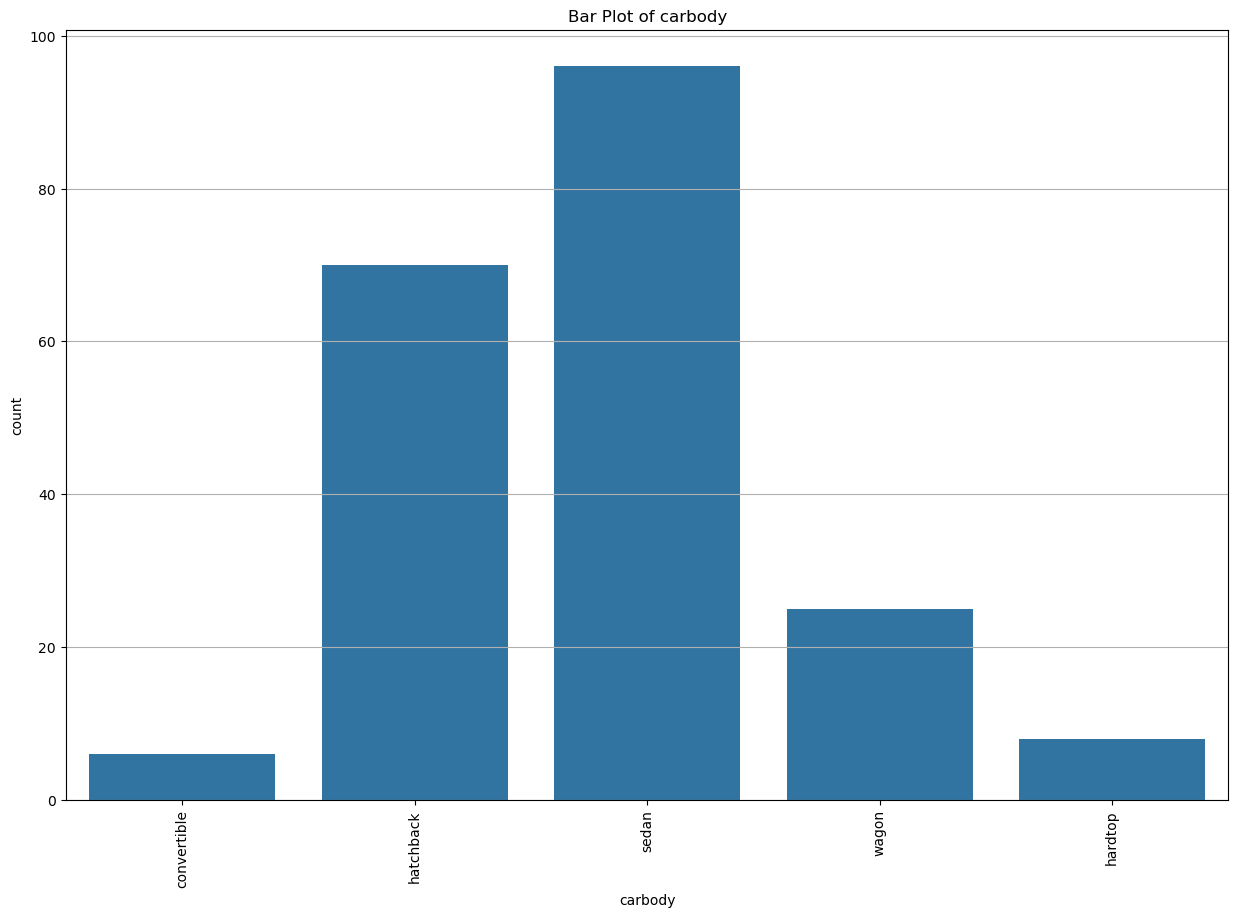

Distribution of drivewheel:
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


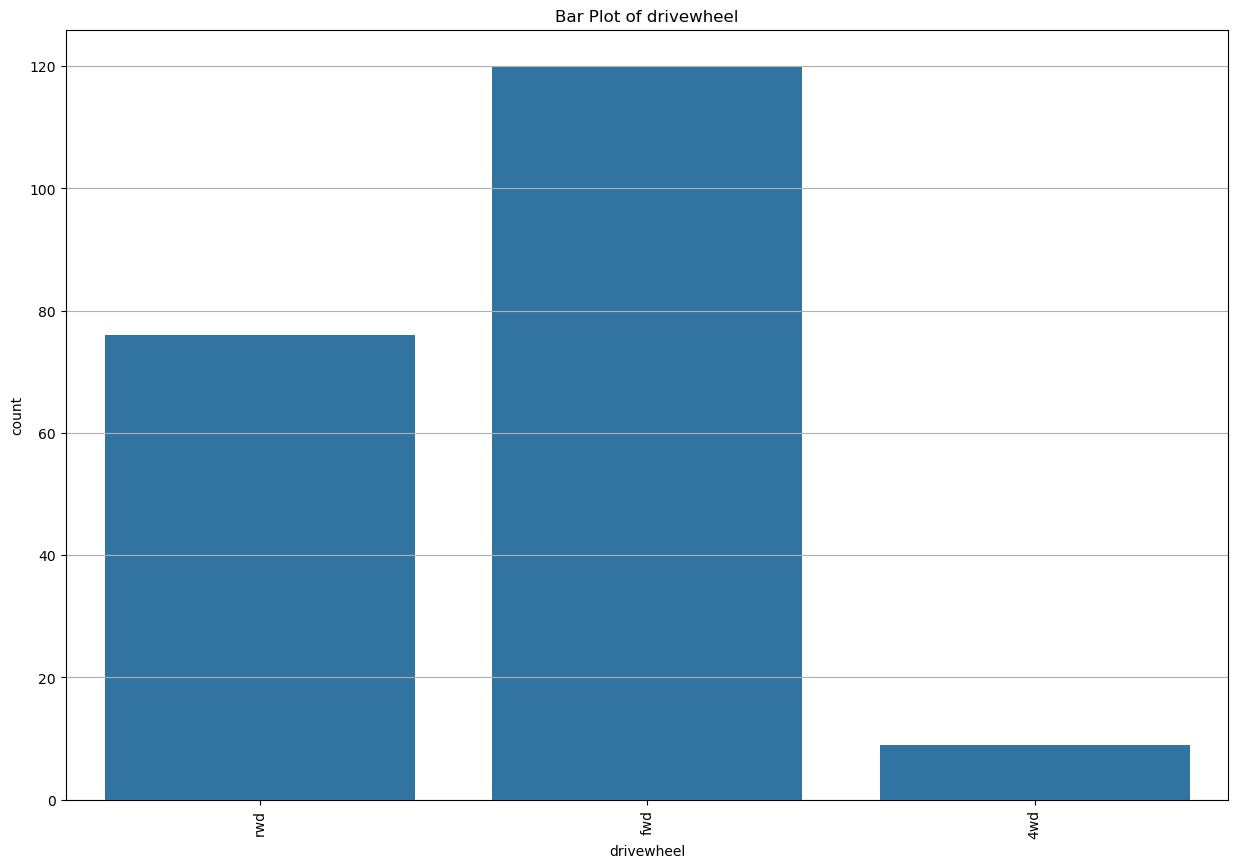

Distribution of enginelocation:
enginelocation
front    202
rear       3
Name: count, dtype: int64


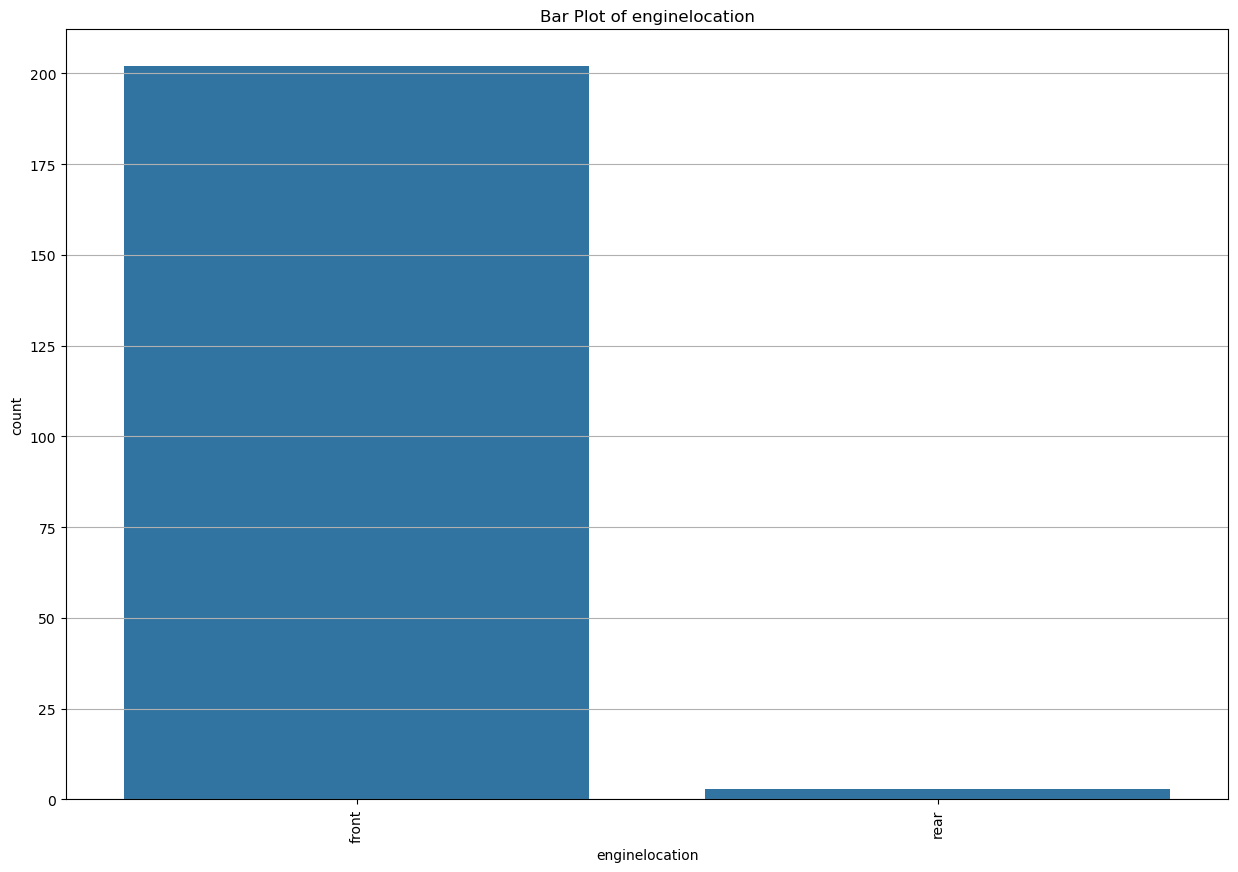

Distribution of enginetype:
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


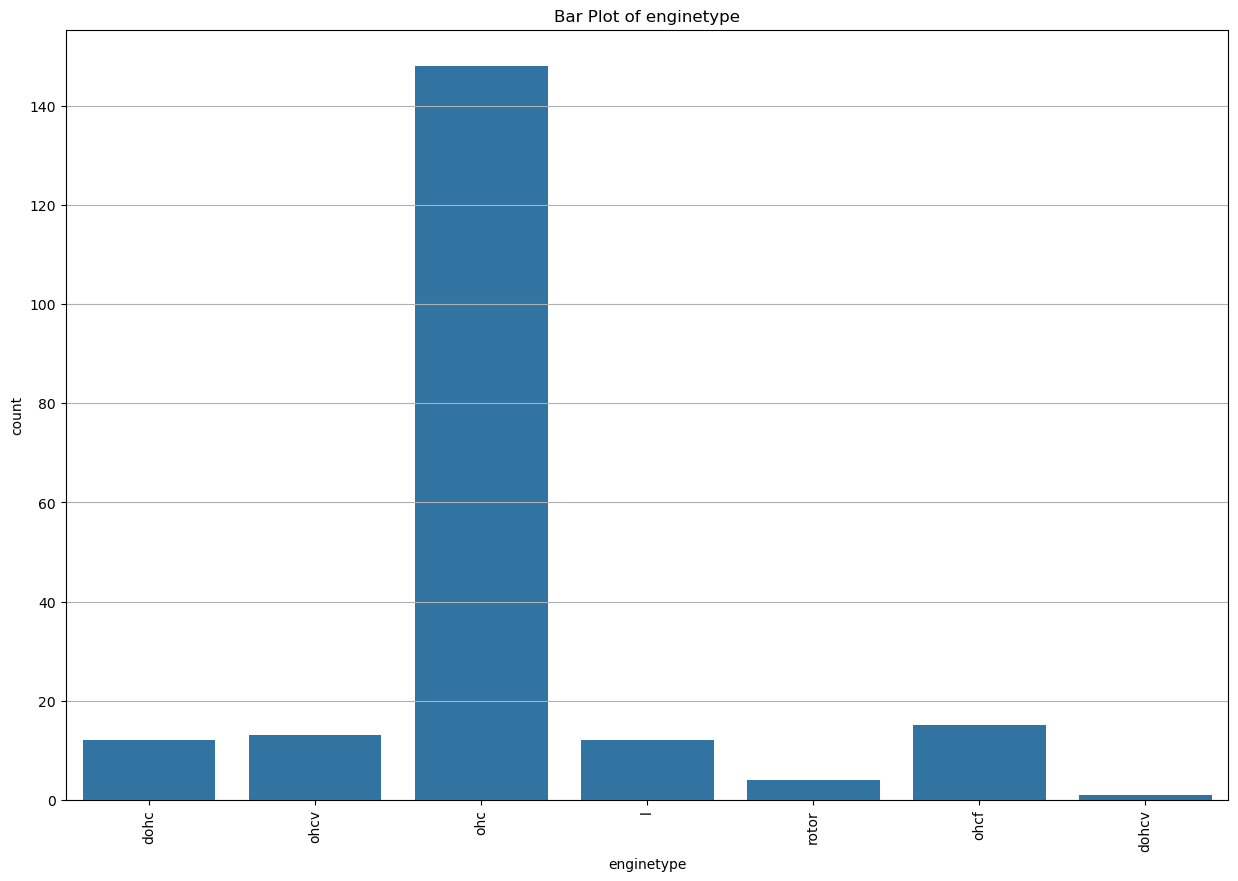

Distribution of cylindernumber:
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


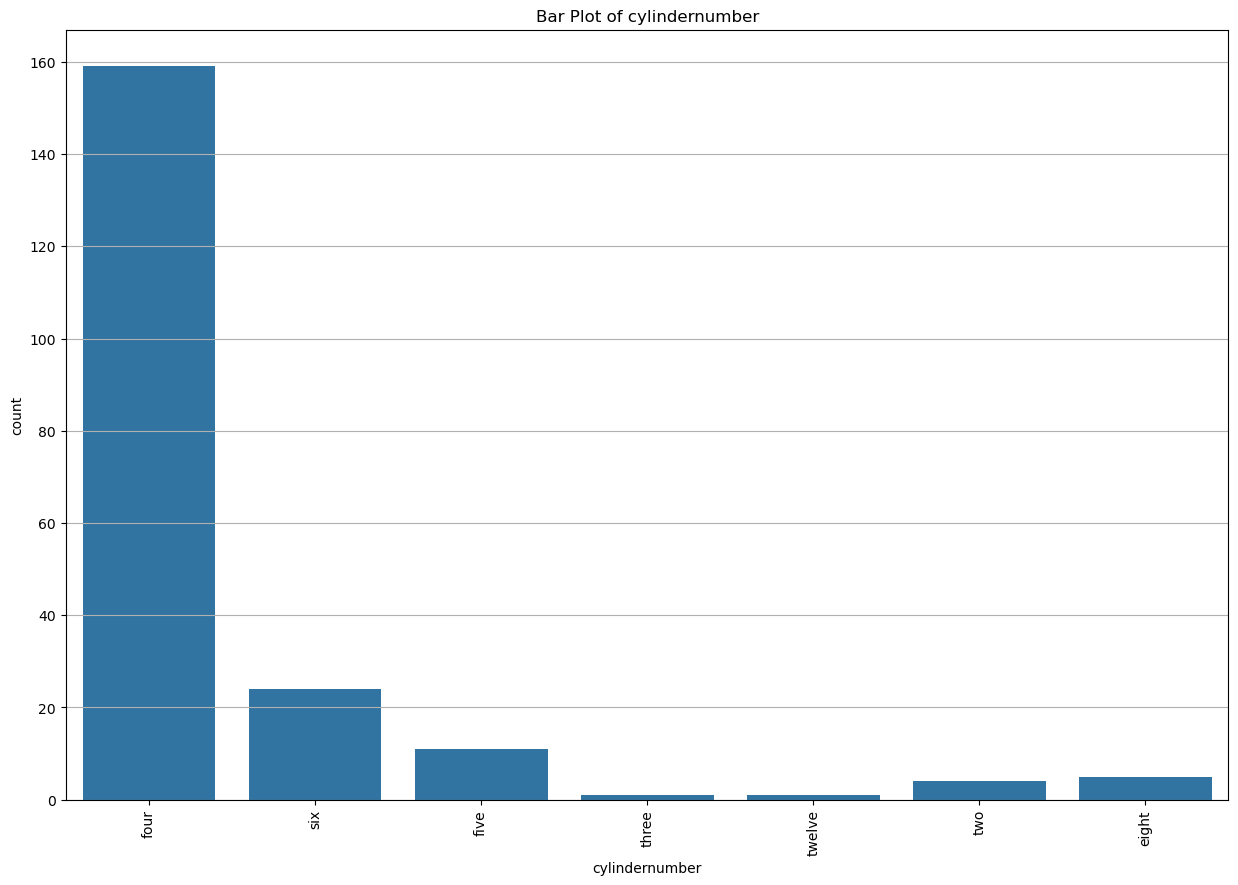

Distribution of fuelsystem:
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


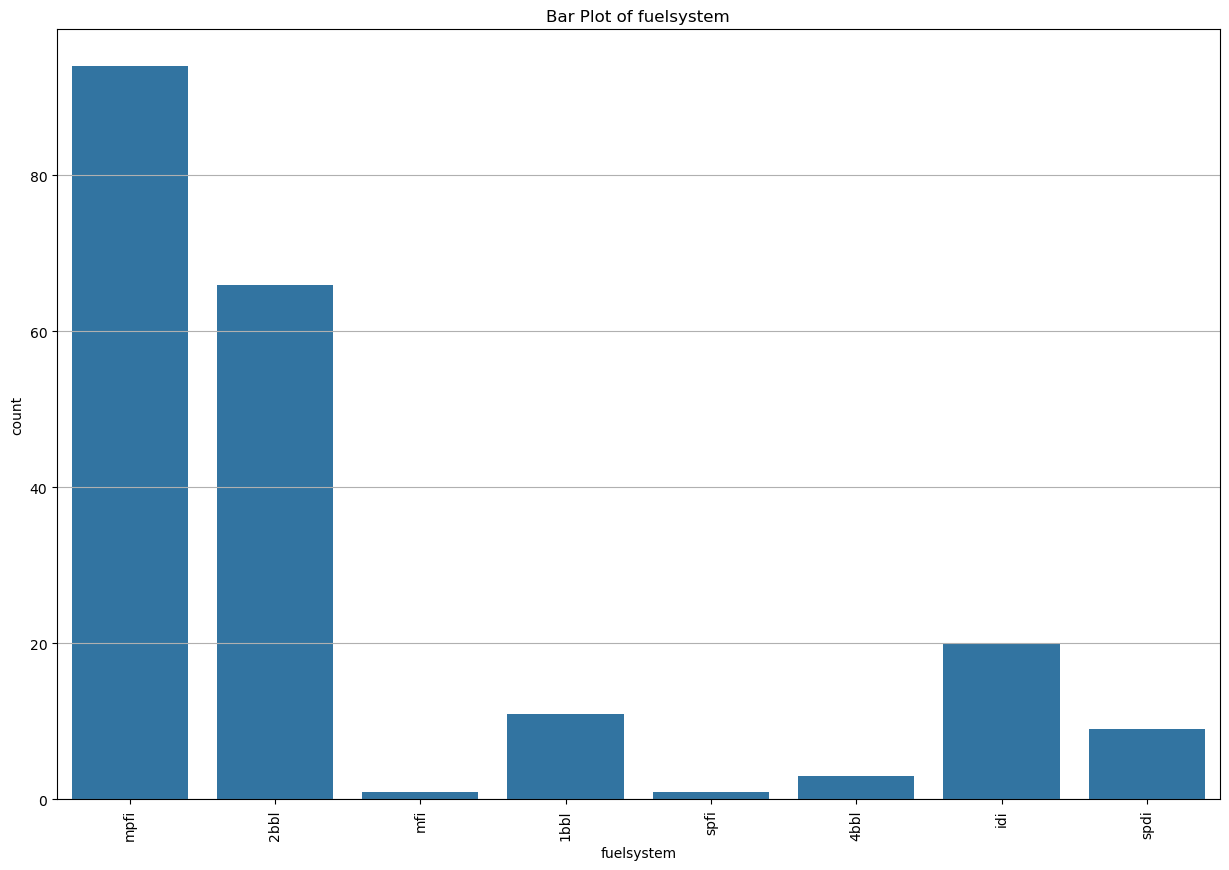

In [22]:
# Distribution of column and unique values
for col in cat_cols:
    print(f"Distribution of {col}:")
    print(df[col].value_counts())

    # Bar plot visualization
    plt.figure(figsize=(15, 10))
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=90)

     # Grid lines only for y-axis
    plt.grid(axis='y')
    
    plt.show()
    

## Data Preprocessing

In [23]:
df1 =  df.copy()

In [24]:
df1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Handling Outliers

In [25]:
numerical_columns= df1.select_dtypes(include=['number']).columns.tolist()

# Calculate Q1, Q3, and IQR
Q1 = df1[numerical_columns].quantile(0.25)
Q3 = df1[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df1[numerical_columns] < lower_bound) | (df1[numerical_columns] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
car_ID               0
symboling            0
wheelbase            3
carlength            1
carwidth             8
carheight            0
curbweight           0
enginesize          10
boreratio            0
stroke              20
compressionratio    28
horsepower           6
peakrpm              2
citympg              2
highwaympg           3
price               15
dtype: int64


In [26]:
# Cap outliers to the threshold values (IQR method)
df1[numerical_columns] = df1[numerical_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Shape after capping outliers:", df1[numerical_columns].shape)


Shape after capping outliers: (205, 16)


In [27]:
s=df1[numerical_columns].skew()
s

car_ID              0.000000
symboling           0.211072
wheelbase           0.924916
carlength           0.155954
carwidth            0.776278
carheight           0.063123
curbweight          0.681398
enginesize          0.908453
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               1.222031
dtype: float64

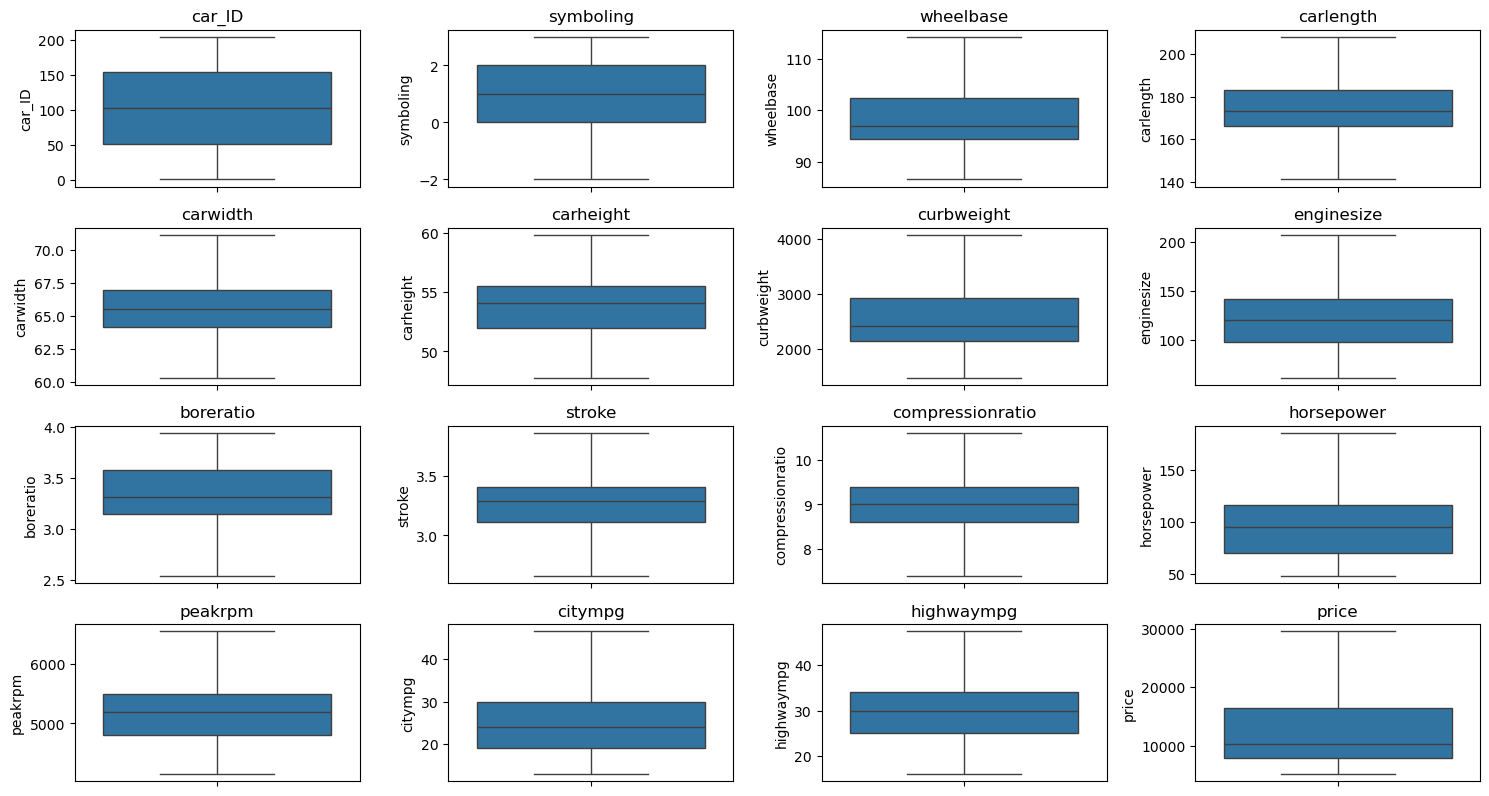

In [28]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df1[numerical_columns]):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

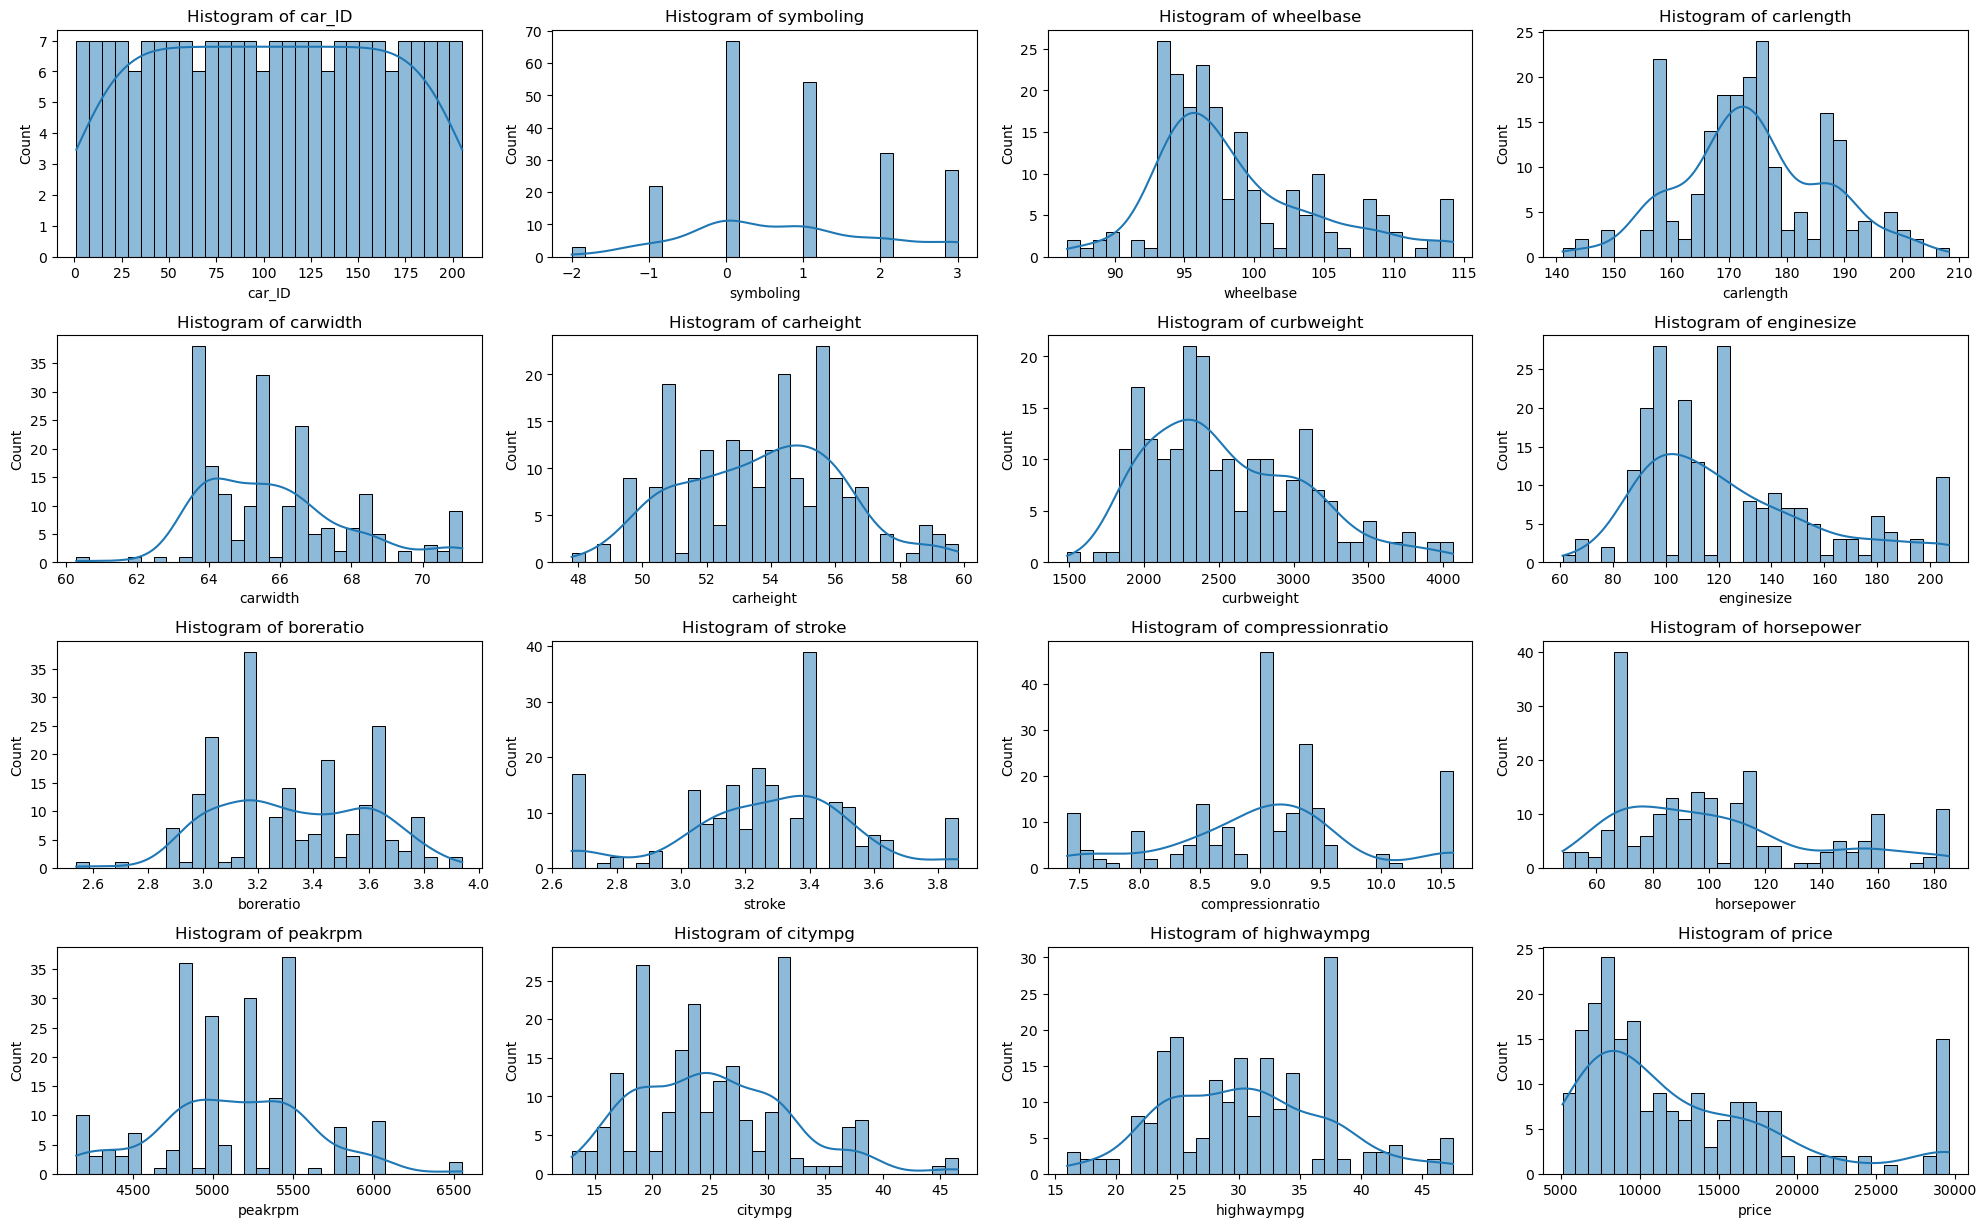

In [29]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df1[numerical_columns], 1):
    plt.subplot(5, 4, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()   

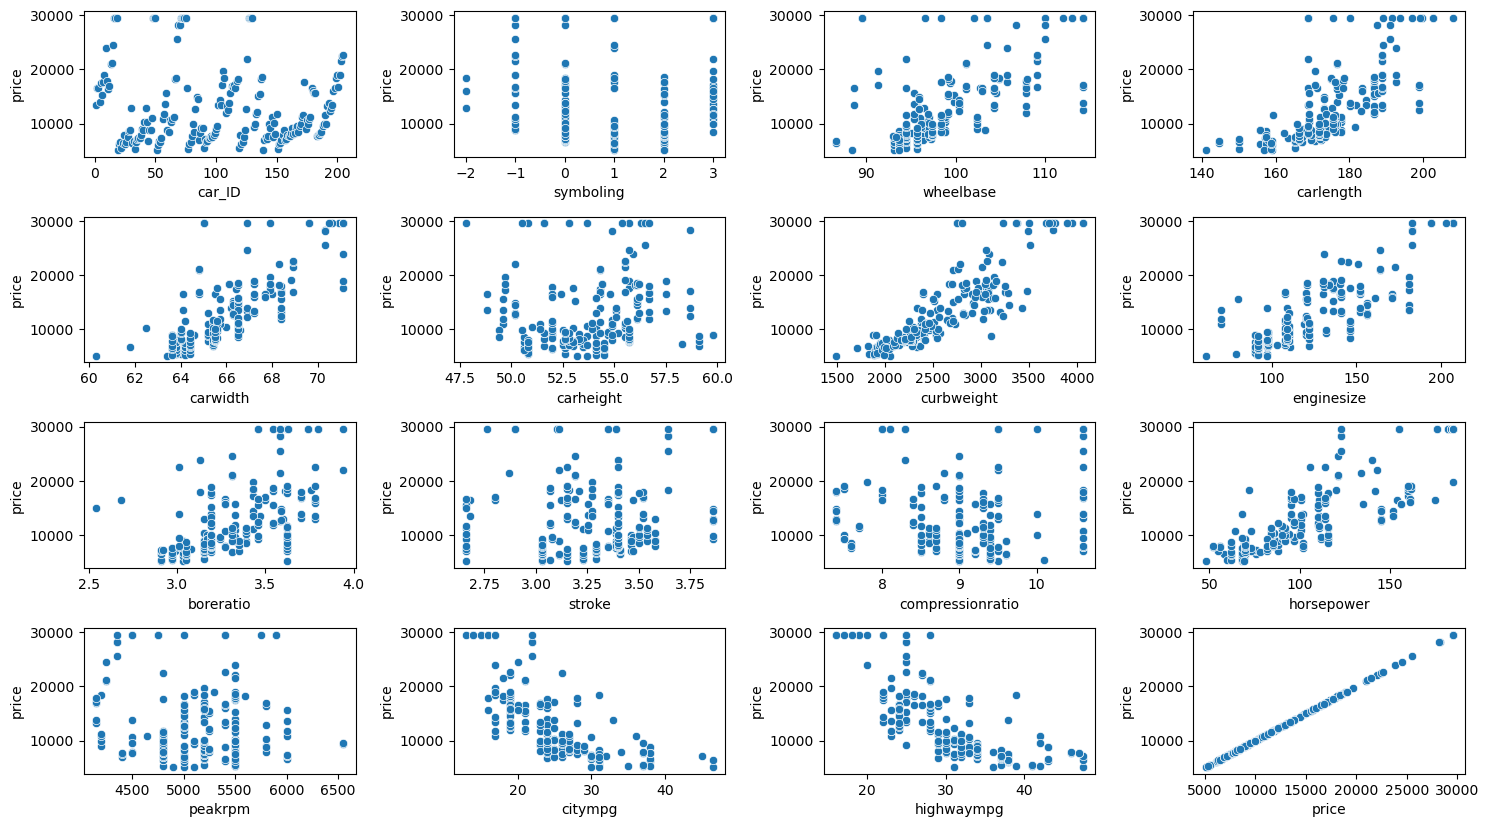

In [30]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df1[numerical_columns]):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df1,x=col,y='price')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

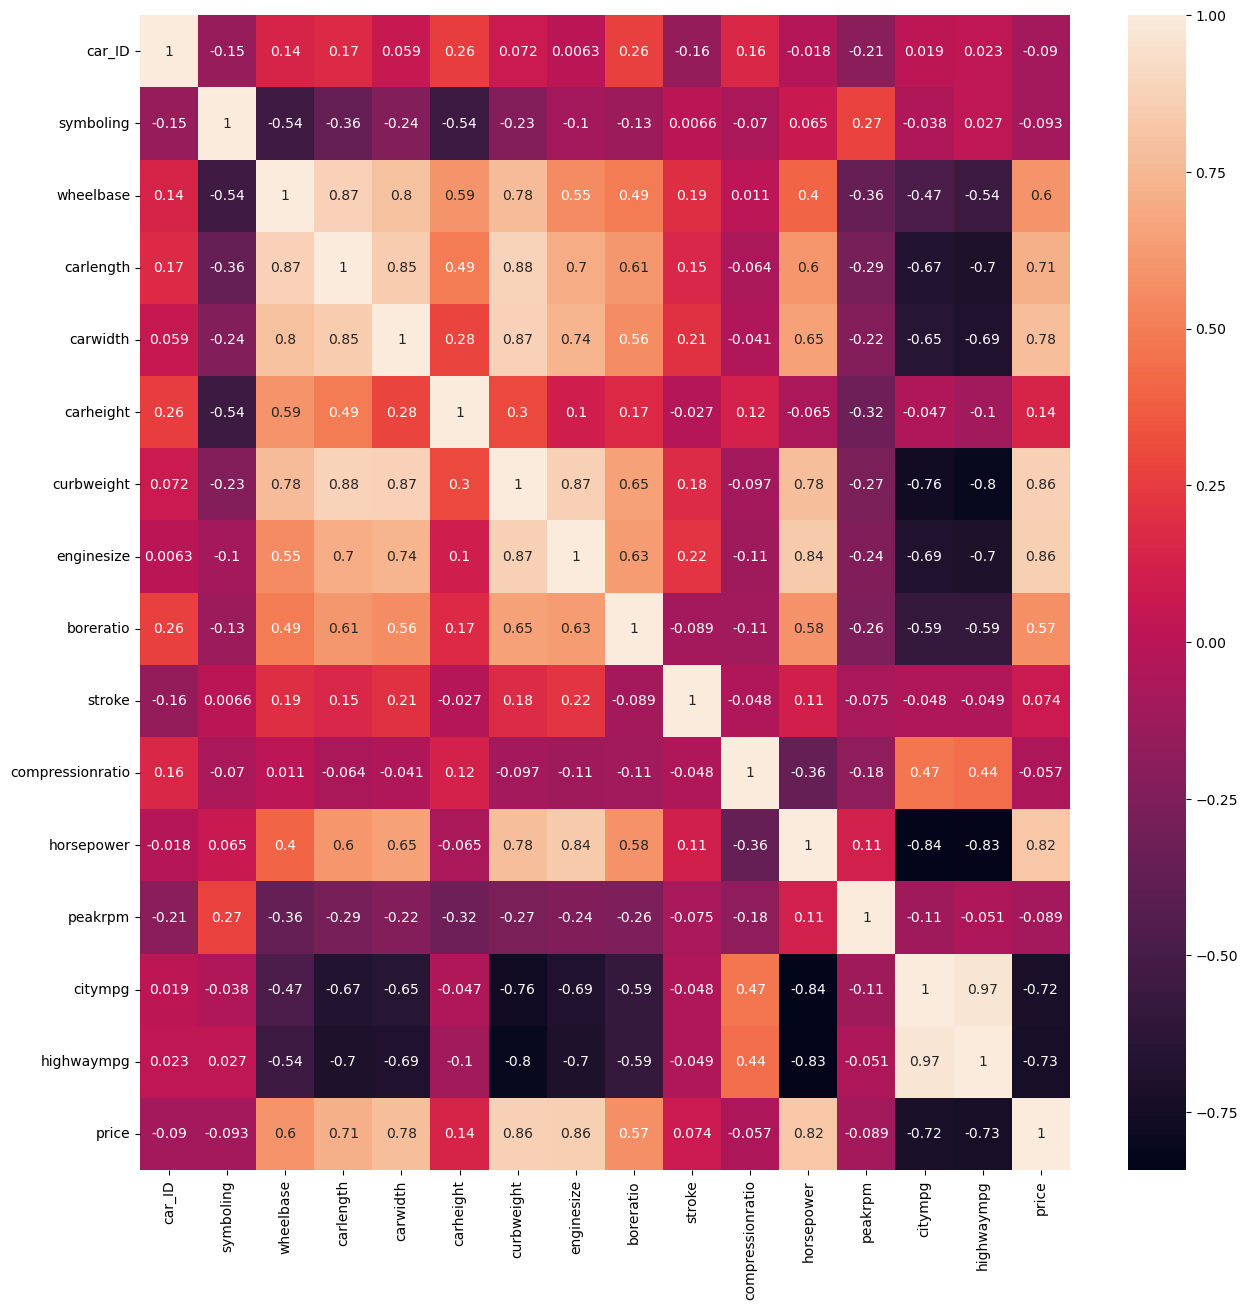

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df1[numerical_columns].corr(),annot=True)
plt.show()

## Feature Engineering: Encoding Categorical Variables

In [32]:
# Checking the number of unique values in each categorical column
unique_counts = df1.select_dtypes(include='object').nunique()
unique_counts

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

In [33]:
Categorical_cols = df1.select_dtypes(include='object').columns

In [34]:
Categorical_cols.shape 

(10,)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

binary_cols = ['doornumber', 'cylindernumber','CarName']
for col in binary_cols:
    df1[col] = le.fit_transform(df1[col])

# One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['carbody', 'drivewheel', 'fueltype', 'aspiration', 'enginelocation','fuelsystem','enginetype'])


In [36]:
df1.head()

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,3,2,1,88.6,168.8,64.1,48.8,2548,2,...,True,False,False,True,False,False,False,False,False,False
1,2,3,3,1,88.6,168.8,64.1,48.8,2548,2,...,True,False,False,True,False,False,False,False,False,False
2,3,1,1,1,94.5,171.2,65.5,52.4,2823,3,...,True,False,False,False,False,False,False,False,True,False
3,4,2,4,0,99.8,176.6,66.2,54.3,2337,2,...,True,False,False,False,False,False,True,False,False,False
4,5,2,5,0,99.4,176.6,66.4,54.3,2824,1,...,True,False,False,False,False,False,True,False,False,False


In [37]:
boolean_cols = df1.select_dtypes(include='bool').columns
df1[boolean_cols] = df1[boolean_cols].astype(int)

#df1 = df1.astype(int)

In [38]:
df1

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,3,2,1,88.6,168.8,64.1,48.8,2548,2,...,1,0,0,1,0,0,0,0,0,0
1,2,3,3,1,88.6,168.8,64.1,48.8,2548,2,...,1,0,0,1,0,0,0,0,0,0
2,3,1,1,1,94.5,171.2,65.5,52.4,2823,3,...,1,0,0,0,0,0,0,0,1,0
3,4,2,4,0,99.8,176.6,66.2,54.3,2337,2,...,1,0,0,0,0,0,1,0,0,0
4,5,2,5,0,99.4,176.6,66.4,54.3,2824,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,0,109.1,188.8,68.9,55.5,2952,2,...,1,0,0,0,0,0,1,0,0,0
201,202,-1,138,0,109.1,188.8,68.8,55.5,3049,2,...,1,0,0,0,0,0,1,0,0,0
202,203,-1,140,0,109.1,188.8,68.9,55.5,3012,3,...,1,0,0,0,0,0,0,0,1,0
203,204,-1,142,0,109.1,188.8,68.9,55.5,3217,3,...,0,0,0,0,0,0,1,0,0,0


In [39]:
df1.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

<Axes: >

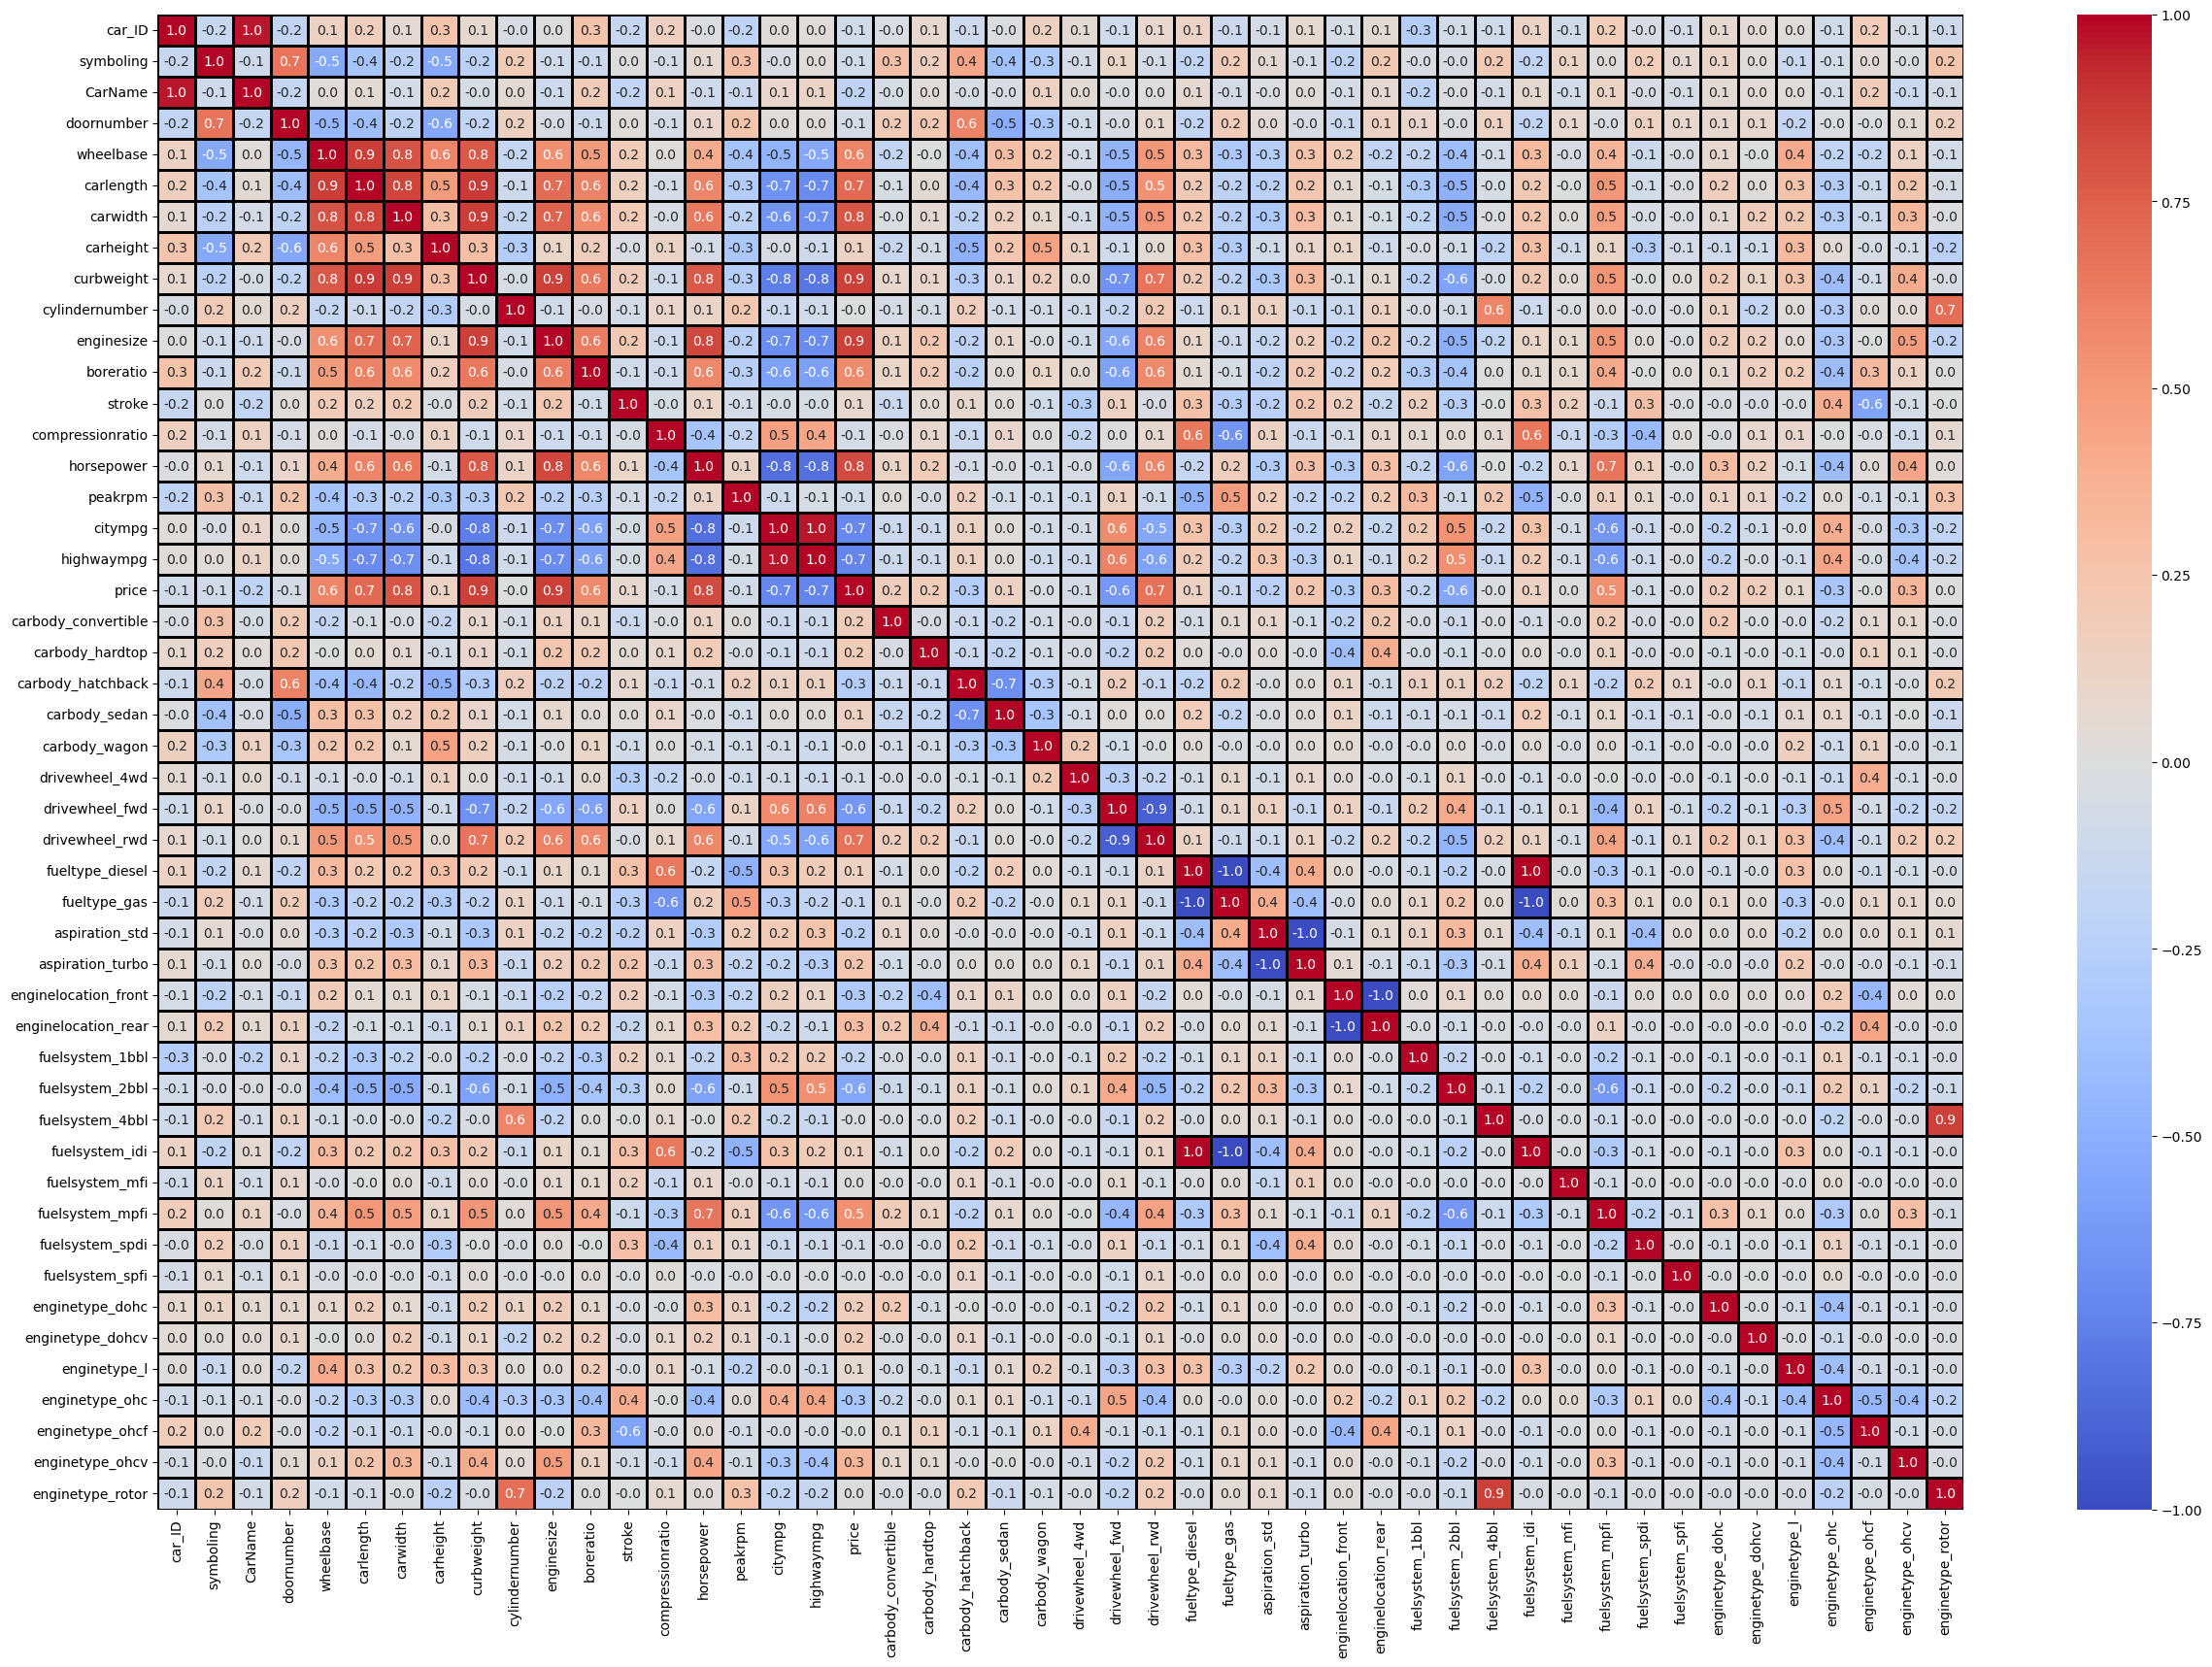

In [40]:
plt.figure(figsize=(30,20))
sns.heatmap(df1.corr(),annot=True,  cmap='coolwarm', fmt="0.1f", linewidth=1,linecolor='black')

### Splitting the dataset and setting the target variable

In [41]:
df2 = df1.copy()

In [42]:
y = df2['price']

In [43]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [44]:
x = df2.drop('price', axis=1)

In [45]:
 x

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,3,2,1,88.6,168.8,64.1,48.8,2548,2,...,1,0,0,1,0,0,0,0,0,0
1,2,3,3,1,88.6,168.8,64.1,48.8,2548,2,...,1,0,0,1,0,0,0,0,0,0
2,3,1,1,1,94.5,171.2,65.5,52.4,2823,3,...,1,0,0,0,0,0,0,0,1,0
3,4,2,4,0,99.8,176.6,66.2,54.3,2337,2,...,1,0,0,0,0,0,1,0,0,0
4,5,2,5,0,99.4,176.6,66.4,54.3,2824,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,0,109.1,188.8,68.9,55.5,2952,2,...,1,0,0,0,0,0,1,0,0,0
201,202,-1,138,0,109.1,188.8,68.8,55.5,3049,2,...,1,0,0,0,0,0,1,0,0,0
202,203,-1,140,0,109.1,188.8,68.9,55.5,3012,3,...,1,0,0,0,0,0,0,0,1,0
203,204,-1,142,0,109.1,188.8,68.9,55.5,3217,3,...,0,0,0,0,0,0,1,0,0,0


## Feature Selection: Filter Methods

**RandomForestRegressor**

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit the model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(x, y)

RandomForestRegressor(random_state=42)

In [47]:
# Get feature importances
importances = rf.feature_importances_

# Pair feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
8             curbweight    0.479740
10            enginesize    0.297671
14            horsepower    0.066538
17            highwaympg    0.066089
0                 car_ID    0.016785
2                CarName    0.010927
6               carwidth    0.010481
16               citympg    0.010475
5              carlength    0.006813
4              wheelbase    0.006374
15               peakrpm    0.005377
7              carheight    0.004328
12                stroke    0.003856
11             boreratio    0.003737
13      compressionratio    0.001390
37       fuelsystem_mpfi    0.001374
20     carbody_hatchback    0.001104
24        drivewheel_fwd    0.000818
1              symboling    0.000711
25        drivewheel_rwd    0.000557
21         carbody_sedan    0.000549
33       fuelsystem_2bbl    0.000512
43        enginetype_ohc    0.000510
9         cylindernumber    0.000476
28        aspiration_std    0.000464
18   carbody_convertible    0.000353
2

In [48]:
threshold = 0.01  # Adjust this value as needed
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']
#x_selected = x[selected_features]

print(selected_features)

8     curbweight
10    enginesize
14    horsepower
17    highwaympg
0         car_ID
2        CarName
6       carwidth
16       citympg
Name: Feature, dtype: object


**SelectKBest Filter**

In [49]:
from sklearn.feature_selection import SelectKBest, f_regression

# 1. Initialize SelectKBest with a scoring function and number of features to select
k_best = SelectKBest(score_func=f_regression, k=12)

# 2. Fit and transform the feature set (X) with respect to the target variable (y)
X_k_best = k_best.fit_transform(x, y)

# 3. Get the scores for each feature
feature_scores = k_best.scores_

# 4. Retrieve the names of the selected features
selected_features = x.columns[k_best.get_support()].tolist()

#selected_features = x.columns

# Output the results
print("2. SelectKBest Results:")
print(f"Features selected: {len(selected_features)}")
print("Selected features:", selected_features)
print("\nFeature Scores:")
#print(pd.DataFrame({'Feature': x.columns, 'Score': feature_scores}).sort_values(by='Score', ascending=False).head(12))

scores = pd.DataFrame({'Feature': x.columns, 'Score': feature_scores})

scores_sorted = scores.sort_values(by='Score', ascending=False).head(12)

print(scores_sorted)

# 4. Convert X_k_best to a DataFrame for scaling
X_k_best_df = pd.DataFrame(X_k_best, columns=selected_features)


2. SelectKBest Results:
Features selected: 12
Selected features: ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl']

Feature Scores:
            Feature       Score
8        curbweight  601.050415
10       enginesize  576.892844
14       horsepower  422.030341
6          carwidth  322.157252
17       highwaympg  236.683643
16          citympg  216.370488
5         carlength  209.259842
25   drivewheel_rwd  168.411982
24   drivewheel_fwd  138.605785
4         wheelbase  111.780954
11        boreratio   99.069049
33  fuelsystem_2bbl   88.285365


### Identifying the significant variables affecting car prices

In [50]:
print(scores_sorted)

            Feature       Score
8        curbweight  601.050415
10       enginesize  576.892844
14       horsepower  422.030341
6          carwidth  322.157252
17       highwaympg  236.683643
16          citympg  216.370488
5         carlength  209.259842
25   drivewheel_rwd  168.411982
24   drivewheel_fwd  138.605785
4         wheelbase  111.780954
11        boreratio   99.069049
33  fuelsystem_2bbl   88.285365


In [51]:
X_k_best_df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,0.0,1.0,0.0
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,0.0,1.0,0.0
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,0.0,1.0,0.0
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,1.0,0.0,0.0
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952.0,141.0,3.78,114.0,23.0,28.0,0.0,1.0,0.0
201,109.1,188.8,68.8,3049.0,141.0,3.78,160.0,19.0,25.0,0.0,1.0,0.0
202,109.1,188.8,68.9,3012.0,173.0,3.58,134.0,18.0,23.0,0.0,1.0,0.0
203,109.1,188.8,68.9,3217.0,145.0,3.01,106.0,26.0,27.0,0.0,1.0,0.0


**Notes:**

Scoring Function:

* f_regression: Calculates the correlation between each feature and the target variable.
You can also use other scoring functions like mutual_info_regression.
Fit and Transform:The fit_transform() method computes scores and retains the top 𝑘 k features.

*Feature Scores:
k_best.scores_ provides scores for all features, allowing you to rank them.
Feature Selection:

*get_support() provides a boolean mask of the selected features.


## Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Feature Scaling(standardization & normalization)
# Create scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply different scaling methods
X_standardized = standard_scaler.fit_transform(X_k_best_df)
X_normalized = minmax_scaler.fit_transform(X_k_best_df)

In [53]:
# Convert to DataFrames for better visualization
X_standardized = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized = pd.DataFrame(X_normalized, columns=selected_features)

In [54]:
X_standardized

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl
0,-1.723005,-0.426521,-0.858695,-0.014566,0.160196,0.519071,0.229801,-0.649321,-0.552143,-1.188177,1.302831,-0.689072
1,-1.723005,-0.426521,-0.858695,-0.014566,0.160196,0.519071,0.229801,-0.649321,-0.552143,-1.188177,1.302831,-0.689072
2,-0.717590,-0.231513,-0.184978,0.514882,0.809329,-2.404880,1.441341,-0.958163,-0.702161,-1.188177,1.302831,-0.689072
3,0.185580,0.207256,0.151880,-0.420797,-0.459430,-0.517266,-0.023777,-0.186058,-0.102086,0.841625,-0.767559,-0.689072
4,0.117416,0.207256,0.248125,0.516807,0.337232,-0.517266,0.342502,-1.112584,-1.302237,-1.188177,-0.767559,-0.689072
...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.770387,1.198549,1.451189,0.763241,0.484762,1.666445,0.314327,-0.340479,-0.402124,-1.188177,1.302831,-0.689072
201,1.770387,1.198549,1.403066,0.949992,0.484762,1.666445,1.610393,-0.958163,-0.852180,-1.188177,1.302831,-0.689072
202,1.770387,1.198549,1.451189,0.878757,1.428955,0.926204,0.877834,-1.112584,-1.152218,-1.188177,1.302831,-0.689072
203,1.770387,1.198549,1.451189,1.273437,0.602787,-1.183483,0.088924,0.122783,-0.552143,-1.188177,1.302831,-0.689072


## Split Data into Training and Testing Sets

In [55]:
X_k_best.shape

(205, 12)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.2, random_state=42)

In [57]:
# Print dataset shapes to confirm correctness
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {len(y_train)}")
print(f"y_test shape: {len(y_test)}")

X_train shape: (164, 12)
X_test shape: (41, 12)
y_train shape: 164
y_test shape: 41


In [58]:
# Feature Scaling
print("\nScaling features...")
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Scaling features...


## Build the ML Model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\nTraining models...")
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'DecisionTreeRegression' : DecisionTreeRegressor(),
}


Training models...


In [60]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # 12. Model Evaluation
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }


Training Linear Regression...

Training SVR...

Training Random Forest...

Training Gradient Boosting...

Training DecisionTreeRegression...


In [61]:
# Print model performance
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


#best model = highest R2 score


Model Performance:

Linear Regression:
MAE: 2113.4676
MSE: 7517013.3599
RMSE: 2741.7172
R2: 0.8581

SVR:
MAE: 5095.4857
MSE: 57699512.1483
RMSE: 7596.0195
R2: -0.0895

Random Forest:
MAE: 1023.6786
MSE: 2017957.2337
RMSE: 1420.5482
R2: 0.9619

Gradient Boosting:
MAE: 998.1674
MSE: 1778340.5308
RMSE: 1333.5443
R2: 0.9664

DecisionTreeRegression:
MAE: 1082.2398
MSE: 2082154.6257
RMSE: 1442.9673
R2: 0.9607


### Identifying the best performing model.

In [62]:
# Find best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Gradient Boosting


Compared to other models, Gradient Boosting achieved the best performance on the test data:

* MAE: 998.1674 (lowest among models)
Indicates the smallest average absolute error in price predictions.

* MSE: 1778340.5308 (lowest among models)
Reflects a significant reduction in squared errors, meaning fewer large deviations in predictions.

* RMSE: 1333.5443 (lowest among models)
Demonstrates the model’s overall prediction accuracy is superior.

* R²: 0.9664 (highest among models)
Shows that Gradient Boosting explains the largest proportion of the variance in car prices.

Gradient Boosting is the best model because it achieves:

* High predictive accuracy, as evidenced by an R² of 0.9664.
* Low error rates (MAE, MSE, and RMSE).
* Robust handling of complex, non-linear relationships in the data.

## HyperParameter Tuning

In [63]:
#To get higher value of R2 than the given one,use hypertuning
# 13. Hyperparameter Tuning
print("\nTuning best model...")
if isinstance(best_model, GradientBoostingRegressor):
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }

elif isinstance(best_model, RandomForestRegressor):
    param_grid = {
        'n_estimators': [100, 200], 
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
elif isinstance(best_model, DecisionTreeRegressor):
    param_grid = {
    'max_depth': [None, 10, 20],  # None means no limit on tree depth.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node.
    'max_features': [None, 'sqrt', 'log2']  # Features considered for best split.
}

else:
    param_grid = {}



Tuning best model...


In [64]:

from sklearn.model_selection import train_test_split, GridSearchCV
if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [65]:
import joblib

# 14. Save the Model
print("\nSaving model...")
joblib.dump(best_model_name, 'Car_Price.joblib')
print("Model saved")


Saving model...
Model saved


### checking whether the performance of the model has increased.

In [66]:
# 15. Test with Unseen Data
print("\nTesting with unseen data...")
final_predictions = best_model.predict(x_test)
final_metrics = {
    'MAE': mean_absolute_error(y_test, final_predictions),
    'MSE': mean_squared_error(y_test, final_predictions),
    'RMSE': np.sqrt(mean_squared_error(y_test, final_predictions)),
    'R2': r2_score(y_test, final_predictions)
}


Testing with unseen data...


In [67]:
print("\nFinal Model Performance:")
for metric_name, value in final_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Final Model Performance:
MAE: 988.4428
MSE: 1712242.8883
RMSE: 1308.5270
R2: 0.9677


MAE Improvement:
The Mean Absolute Error decreased from 998.1674 to 988.4428, meaning the tuned model's average prediction error was reduced by ~10. This is a small but meaningful improvement.

MSE Improvement:
The Mean Squared Error dropped significantly from 1,778,340.5308 to 1,712,242.8883, reflecting a noticeable reduction in overall squared prediction errors.

RMSE Improvement:
The Root Mean Squared Error decreased from 1,333.5443 to 1,308.5270, indicating the tuned model is consistently more accurate.

R² Improvement:
The R-squared increased slightly from 0.9664 to 0.9677, showing the tuned model explains slightly more variance in car prices.

The hyperparameter tuning resulted in a modest but consistent improvement in the model's performance across all evaluation metrics. The tuned Gradient Boosting model:
* Has lower prediction errors (MAE, MSE, RMSE).
* Explains slightly more variability in car prices (R²).

## Conclusions

From the analysis, the following conclusions were drawn:

Significant Factors Influencing Car Prices: Key variables impacting car prices include curbweight, enginesize, horsepower, carwidth, and highwaympg. These features highlight the importance of engine performance, car dimensions, and fuel efficiency in determining pricing dynamics.
  
Model Performance:
* Among the regression models, Gradient Boosting Regressor and Random Forest Regressor demonstrated the best performance based on R-squared, MAE, and RMSE. Both models achieved high accuracy, with Gradient Boosting showing slightly better results in terms of error metrics.
* The final tuned model achieved an R2 of 0.9677, indicating that 96.77% of the variance in car prices is explained by the model, making it highly reliable for predictions.

## Future Work

* Incorporate Additional Data Sources: Include data on external factors such as consumer preferences, regional demand, economic conditions, and competitors' pricing strategies to improve the model's generalizability.

* Expand Dataset: Use a larger and more diverse dataset that includes newer car models, electric vehicles, and other emerging trends in the automobile market.
  
* Advanced Modeling:Experiment with deep learning models, such as neural networks, to capture complex relationships between features and price.
Use ensemble methods like stacking or blending to improve model performance further.
